# <center> **Projeto Integrador I** </center>
## <center> Dupla: Larissa Sousa, Ruan Rodrigues</center>

### <center> An√°lise de sentimentos em coment√°rios de supermercados de Itapaj√©: entendendo a opini√£o dos consumidores <center>


---


### Esse projeto consiste na realiza√ß√£o uma an√°lise de sentimento (NLP - processamento de linguagem natural) em avalia√ß√µes e coment√°rios referentes a tr√™s principais supermercados da cidade local, s√£o eles: Deirton, Para Ty e Menor Pre√ßo.



# Preprocessing

##### O mesmo tratamento que foi realizado no dataset `menor_preco`, foi o mesmo para os outros dois datasets. Por esse motivo, mostraremos o passo a passo somente no primeiro.

## Supermercado Menor pre√ßo (C)

### Bibliotecas que ser√£o utilizadas

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import seaborn as sns

In [ ]:
menorpreco = pd.read_csv("/content/menorpreco_bd.csv")
menorpreco

TSUbDb                      A503be  \
0                          Joyce Costa              14 coment√°rios   
1                        Myname Gondim               8 coment√°rios   
2    Francisco Messias Barbosa de Lima       35 coment√°rios9 fotos   
3                           Igor Sousa               3 coment√°rios   
4         INTELIGENCIA ARTIFICIAL 2020      34 coment√°rios79 fotos   
..                                 ...                         ...   
180                   Thayner Oliveira                         NaN   
181                      Genival Viana                         NaN   
182                     Larissa Brioso  339 coment√°rios2.102 fotos   
183             Ana Beatriz Cruz Rocha        16 coment√°rios1 foto   
184                         Ulisses Gp       20 coment√°rios3 fotos   

               dehysf                                             Jtu6Td  \
0    uma semana atr√°s  Ambiente super apertado, aspecto de sujo e alg...   
1        um m√™s atr√°s  Muito apertado o local ,mal da pra gente andar...   
2        4 anos atr√°s  Excelente atendimento e um mundo de produtos a...   
3        4 anos atr√°s  Ambiente agrad√°vel, bom atendimento, funcion√°r...   
4        3 anos atr√°s                        Bom local com pre√ßos baixos   
..                ...                                                ...   
180      6 anos atr√°s                                                NaN   
181      5 anos atr√°s                                                NaN   
182      4 anos atr√°s                                                NaN   
183      3 anos atr√°s                                                NaN   
184      4 anos atr√°s                                                NaN   

     QWOdjf QWOdjf 2                  Txngnb  \
0       0.0   Gostei  Agradecemos sua ajuda.   
1       0.0   Gostei  Agradecemos sua ajuda.   
2       0.0   Gostei  Agradecemos sua ajuda.   
3       0.0   Gostei  Agradecemos sua ajuda.   
4       1.0   Gostei  Agradecemos sua ajuda.   
..      ...      ...                     ...   
180     NaN      NaN                     NaN   
181     NaN      NaN                     NaN   
182     NaN      NaN                     NaN   
183     NaN      NaN                     NaN   
184     NaN      NaN                     NaN   

                                  Txngnb 2        QV3IV Aohxlc 2  
0    Ocorreu um problema. Tente novamente.          NaN      NaN  
1    Ocorreu um problema. Tente novamente.          NaN      NaN  
2    Ocorreu um problema. Tente novamente.  Local Guide        ¬∑  
3    Ocorreu um problema. Tente novamente.          NaN      NaN  
4    Ocorreu um problema. Tente novamente.  Local Guide        ¬∑  
..                                     ...          ...      ...  
180                                    NaN          NaN      NaN  
181                                    NaN          NaN      NaN  
182                                    NaN  Local Guide        ¬∑  
183                                    NaN  Local Guide        ¬∑  
184                                    NaN  Local Guide        ¬∑  

[185 rows x 10 columns]

### Adicionando as notas

In [ ]:
notas_mp = pd.read_csv("/content/notas_mp.csv")
notas_mp

nota
0       1
1       2
2       5
3       5
4       5
..    ...
180     5
181     5
182     4
183     3
184     4

[185 rows x 1 columns]

In [ ]:
menorpreco['nota'] = notas_mp['nota']
menorpreco

TSUbDb                      A503be  \
0                          Joyce Costa              14 coment√°rios   
1                        Myname Gondim               8 coment√°rios   
2    Francisco Messias Barbosa de Lima       35 coment√°rios9 fotos   
3                           Igor Sousa               3 coment√°rios   
4         INTELIGENCIA ARTIFICIAL 2020      34 coment√°rios79 fotos   
..                                 ...                         ...   
180                   Thayner Oliveira                         NaN   
181                      Genival Viana                         NaN   
182                     Larissa Brioso  339 coment√°rios2.102 fotos   
183             Ana Beatriz Cruz Rocha        16 coment√°rios1 foto   
184                         Ulisses Gp       20 coment√°rios3 fotos   

               dehysf                                             Jtu6Td  \
0    uma semana atr√°s  Ambiente super apertado, aspecto de sujo e alg...   
1        um m√™s atr√°s  Muito apertado o local ,mal da pra gente andar...   
2        4 anos atr√°s  Excelente atendimento e um mundo de produtos a...   
3        4 anos atr√°s  Ambiente agrad√°vel, bom atendimento, funcion√°r...   
4        3 anos atr√°s                        Bom local com pre√ßos baixos   
..                ...                                                ...   
180      6 anos atr√°s                                                NaN   
181      5 anos atr√°s                                                NaN   
182      4 anos atr√°s                                                NaN   
183      3 anos atr√°s                                                NaN   
184      4 anos atr√°s                                                NaN   

     QWOdjf QWOdjf 2                  Txngnb  \
0       0.0   Gostei  Agradecemos sua ajuda.   
1       0.0   Gostei  Agradecemos sua ajuda.   
2       0.0   Gostei  Agradecemos sua ajuda.   
3       0.0   Gostei  Agradecemos sua ajuda.   
4       1.0   Gostei  Agradecemos sua ajuda.   
..      ...      ...                     ...   
180     NaN      NaN                     NaN   
181     NaN      NaN                     NaN   
182     NaN      NaN                     NaN   
183     NaN      NaN                     NaN   
184     NaN      NaN                     NaN   

                                  Txngnb 2        QV3IV Aohxlc 2  nota  
0    Ocorreu um problema. Tente novamente.          NaN      NaN     1  
1    Ocorreu um problema. Tente novamente.          NaN      NaN     2  
2    Ocorreu um problema. Tente novamente.  Local Guide        ¬∑     5  
3    Ocorreu um problema. Tente novamente.          NaN      NaN     5  
4    Ocorreu um problema. Tente novamente.  Local Guide        ¬∑     5  
..                                     ...          ...      ...   ...  
180                                    NaN          NaN      NaN     5  
181                                    NaN          NaN      NaN     5  
182                                    NaN  Local Guide        ¬∑     4  
183                                    NaN  Local Guide        ¬∑     3  
184                                    NaN  Local Guide        ¬∑     4  

[185 rows x 11 columns]

### Excluindo colunas irrelevantes

In [ ]:
print(menorpreco.columns)

Index(['TSUbDb', 'A503be', 'dehysf', 'Jtu6Td', 'QWOdjf', 'QWOdjf 2', 'Txngnb',
       'Txngnb 2', 'QV3IV', 'Aohxlc 2', 'nota'],
      dtype='object')


In [ ]:
menorpreco.drop("Txngnb 2", axis=1, inplace=True)
menorpreco.drop("Aohxlc 2", axis=1, inplace=True)
menorpreco.drop("QWOdjf 2", axis=1, inplace=True)

In [ ]:
menorpreco

TSUbDb                      A503be  \
0                          Joyce Costa              14 coment√°rios   
1                        Myname Gondim               8 coment√°rios   
2    Francisco Messias Barbosa de Lima       35 coment√°rios9 fotos   
3                           Igor Sousa               3 coment√°rios   
4         INTELIGENCIA ARTIFICIAL 2020      34 coment√°rios79 fotos   
..                                 ...                         ...   
180                   Thayner Oliveira                         NaN   
181                      Genival Viana                         NaN   
182                     Larissa Brioso  339 coment√°rios2.102 fotos   
183             Ana Beatriz Cruz Rocha        16 coment√°rios1 foto   
184                         Ulisses Gp       20 coment√°rios3 fotos   

               dehysf                                             Jtu6Td  \
0    uma semana atr√°s  Ambiente super apertado, aspecto de sujo e alg...   
1        um m√™s atr√°s  Muito apertado o local ,mal da pra gente andar...   
2        4 anos atr√°s  Excelente atendimento e um mundo de produtos a...   
3        4 anos atr√°s  Ambiente agrad√°vel, bom atendimento, funcion√°r...   
4        3 anos atr√°s                        Bom local com pre√ßos baixos   
..                ...                                                ...   
180      6 anos atr√°s                                                NaN   
181      5 anos atr√°s                                                NaN   
182      4 anos atr√°s                                                NaN   
183      3 anos atr√°s                                                NaN   
184      4 anos atr√°s                                                NaN   

     QWOdjf                  Txngnb        QV3IV  nota  
0       0.0  Agradecemos sua ajuda.          NaN     1  
1       0.0  Agradecemos sua ajuda.          NaN     2  
2       0.0  Agradecemos sua ajuda.  Local Guide     5  
3       0.0  Agradecemos sua ajuda.          NaN     5  
4       1.0  Agradecemos sua ajuda.  Local Guide     5  
..      ...                     ...          ...   ...  
180     NaN                     NaN          NaN     5  
181     NaN                     NaN          NaN     5  
182     NaN                     NaN  Local Guide     4  
183     NaN                     NaN  Local Guide     3  
184     NaN                     NaN  Local Guide     4  

[185 rows x 8 columns]

### Traduzindo os c√≥digos das colunas para nomes

In [ ]:
nome_colunas = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

menorpreco.rename(columns=nome_colunas, inplace=True)
menorpreco

nome                      A503be  \
0                          Joyce Costa              14 coment√°rios   
1                        Myname Gondim               8 coment√°rios   
2    Francisco Messias Barbosa de Lima       35 coment√°rios9 fotos   
3                           Igor Sousa               3 coment√°rios   
4         INTELIGENCIA ARTIFICIAL 2020      34 coment√°rios79 fotos   
..                                 ...                         ...   
180                   Thayner Oliveira                         NaN   
181                      Genival Viana                         NaN   
182                     Larissa Brioso  339 coment√°rios2.102 fotos   
183             Ana Beatriz Cruz Rocha        16 coment√°rios1 foto   
184                         Ulisses Gp       20 coment√°rios3 fotos   

              periodo                                         comentario  \
0    uma semana atr√°s  Ambiente super apertado, aspecto de sujo e alg...   
1        um m√™s atr√°s  Muito apertado o local ,mal da pra gente andar...   
2        4 anos atr√°s  Excelente atendimento e um mundo de produtos a...   
3        4 anos atr√°s  Ambiente agrad√°vel, bom atendimento, funcion√°r...   
4        3 anos atr√°s                        Bom local com pre√ßos baixos   
..                ...                                                ...   
180      6 anos atr√°s                                                NaN   
181      5 anos atr√°s                                                NaN   
182      4 anos atr√°s                                                NaN   
183      3 anos atr√°s                                                NaN   
184      4 anos atr√°s                                                NaN   

     quant_like_coment          feedback_super  local_guide  nota  
0                  0.0  Agradecemos sua ajuda.          NaN     1  
1                  0.0  Agradecemos sua ajuda.          NaN     2  
2                  0.0  Agradecemos sua ajuda.  Local Guide     5  
3                  0.0  Agradecemos sua ajuda.          NaN     5  
4                  1.0  Agradecemos sua ajuda.  Local Guide     5  
..                 ...                     ...          ...   ...  
180                NaN                     NaN          NaN     5  
181                NaN                     NaN          NaN     5  
182                NaN                     NaN  Local Guide     4  
183                NaN                     NaN  Local Guide     3  
184                NaN                     NaN  Local Guide     4  

[185 rows x 8 columns]

### Atribuindo valores √†s NAs

In [ ]:
menorpreco['quant_like_coment'].fillna(0, inplace=True)

menorpreco['local_guide'].fillna("Not Local Guide", inplace=True)

menorpreco['comentario'].fillna("Sem coment√°rio", inplace=True)

menorpreco['feedback_super'].fillna("Sem feedback", inplace=True)

menorpreco

nome                      A503be  \
0                          Joyce Costa              14 coment√°rios   
1                        Myname Gondim               8 coment√°rios   
2    Francisco Messias Barbosa de Lima       35 coment√°rios9 fotos   
3                           Igor Sousa               3 coment√°rios   
4         INTELIGENCIA ARTIFICIAL 2020      34 coment√°rios79 fotos   
..                                 ...                         ...   
180                   Thayner Oliveira                         NaN   
181                      Genival Viana                         NaN   
182                     Larissa Brioso  339 coment√°rios2.102 fotos   
183             Ana Beatriz Cruz Rocha        16 coment√°rios1 foto   
184                         Ulisses Gp       20 coment√°rios3 fotos   

              periodo                                         comentario  \
0    uma semana atr√°s  Ambiente super apertado, aspecto de sujo e alg...   
1        um m√™s atr√°s  Muito apertado o local ,mal da pra gente andar...   
2        4 anos atr√°s  Excelente atendimento e um mundo de produtos a...   
3        4 anos atr√°s  Ambiente agrad√°vel, bom atendimento, funcion√°r...   
4        3 anos atr√°s                        Bom local com pre√ßos baixos   
..                ...                                                ...   
180      6 anos atr√°s                                     Sem coment√°rio   
181      5 anos atr√°s                                     Sem coment√°rio   
182      4 anos atr√°s                                     Sem coment√°rio   
183      3 anos atr√°s                                     Sem coment√°rio   
184      4 anos atr√°s                                     Sem coment√°rio   

     quant_like_coment          feedback_super      local_guide  nota  
0                  0.0  Agradecemos sua ajuda.  Not Local Guide     1  
1                  0.0  Agradecemos sua ajuda.  Not Local Guide     2  
2                  0.0  Agradecemos sua ajuda.      Local Guide     5  
3                  0.0  Agradecemos sua ajuda.  Not Local Guide     5  
4                  1.0  Agradecemos sua ajuda.      Local Guide     5  
..                 ...                     ...              ...   ...  
180                0.0            Sem feedback  Not Local Guide     5  
181                0.0            Sem feedback  Not Local Guide     5  
182                0.0            Sem feedback      Local Guide     4  
183                0.0            Sem feedback      Local Guide     3  
184                0.0            Sem feedback      Local Guide     4  

[185 rows x 8 columns]

### Dividindo a coluna "A503be" em duas: **quantidade de comentarios** e **quantidade de fotos**

In [ ]:
divisao = pd.DataFrame(menorpreco['A503be'])

divisao['quant_comentarios'] = divisao['A503be'].str.extract(r'(\d+) coment√°rios', expand=False).fillna(0).astype(int)
divisao['quant_fotos'] = divisao['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisao[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   14            0
1                    8            0
2                   35            9
3                    3            0
4                   34           79
..                 ...          ...
180                  0            0
181                  0            0
182                339          102
183                 16            0
184                 20            3

[185 rows x 2 columns]


### Adicionando as colunas **quantidade de comentarios** e **quantidade de fotos** no dataset original

In [ ]:
menorpreco = pd.concat([menorpreco, divisao[['quant_comentarios', 'quant_fotos']]], axis=1)

### Excluindo a coluna antiga "A503be"

In [ ]:
menorpreco.drop("A503be", axis=1, inplace=True)

In [ ]:
menorpreco

nome           periodo  \
0                          Joyce Costa  uma semana atr√°s   
1                        Myname Gondim      um m√™s atr√°s   
2    Francisco Messias Barbosa de Lima      4 anos atr√°s   
3                           Igor Sousa      4 anos atr√°s   
4         INTELIGENCIA ARTIFICIAL 2020      3 anos atr√°s   
..                                 ...               ...   
180                   Thayner Oliveira      6 anos atr√°s   
181                      Genival Viana      5 anos atr√°s   
182                     Larissa Brioso      4 anos atr√°s   
183             Ana Beatriz Cruz Rocha      3 anos atr√°s   
184                         Ulisses Gp      4 anos atr√°s   

                                            comentario  quant_like_coment  \
0    Ambiente super apertado, aspecto de sujo e alg...                0.0   
1    Muito apertado o local ,mal da pra gente andar...                0.0   
2    Excelente atendimento e um mundo de produtos a...                0.0   
3    Ambiente agrad√°vel, bom atendimento, funcion√°r...                0.0   
4                          Bom local com pre√ßos baixos                1.0   
..                                                 ...                ...   
180                                     Sem coment√°rio                0.0   
181                                     Sem coment√°rio                0.0   
182                                     Sem coment√°rio                0.0   
183                                     Sem coment√°rio                0.0   
184                                     Sem coment√°rio                0.0   

             feedback_super      local_guide  nota  quant_comentarios  \
0    Agradecemos sua ajuda.  Not Local Guide     1                 14   
1    Agradecemos sua ajuda.  Not Local Guide     2                  8   
2    Agradecemos sua ajuda.      Local Guide     5                 35   
3    Agradecemos sua ajuda.  Not Local Guide     5                  3   
4    Agradecemos sua ajuda.      Local Guide     5                 34   
..                      ...              ...   ...                ...   
180            Sem feedback  Not Local Guide     5                  0   
181            Sem feedback  Not Local Guide     5                  0   
182            Sem feedback      Local Guide     4                339   
183            Sem feedback      Local Guide     3                 16   
184            Sem feedback      Local Guide     4                 20   

     quant_fotos  
0              0  
1              0  
2              9  
3              0  
4             79  
..           ...  
180            0  
181            0  
182          102  
183            0  
184            3  

[185 rows x 9 columns]

### Criando duas colunas (**nome** e **endere√ßo** do supermercado) para nos ajudar futuramente a analisar cada supermercado separadamente, quando juntarmos os dados de todos os supermercados.

In [ ]:
menorpreco['supermercado'] = 'Menor pre√ßo'
menorpreco['rua_supermercado'] = 'Manoel Lu√≠s da Rocha, 87'

In [ ]:
df_menorpreco = menorpreco

### Salvando o dataset

In [ ]:
df_menorpreco.to_csv("menorpreco_tratado.csv")

# Supermercado Para Ty (B)

In [ ]:
paraty = pd.read_csv("/content/paraty_bd.csv")
paraty

TSUbDb                   A503be        QV3IV  \
0                 Elisa Vaz           10 coment√°rios  Local Guide   
1                Jane Meire     3 coment√°rios6 fotos          NaN   
2             Jocasta Silva   10 coment√°rios12 fotos  Local Guide   
3              Valmy Mendes     4 coment√°rios2 fotos          NaN   
4    Fabio Teles Cruz Fabio                      NaN          NaN   
..                      ...                      ...          ...   
359   Tainara Cruz de sousa            7 coment√°rios          NaN   
360        Valeska Mesquita                      NaN          NaN   
361          Zuila de sousa     8 coment√°rios6 fotos          NaN   
362  Vanderli Barbosa Pinto                      NaN          NaN   
363           Gledson Silva  155 coment√°rios18 fotos  Local Guide   

              dehysf                 Jtu6Td  QWOdjf QWOdjf 2  \
0    2 semanas atr√°s                      ü§¢     0.0   Gostei   
1    3 semanas atr√°s                    NaN     NaN      NaN   
2       um m√™s atr√°s  Excelente atendimento     0.0   Gostei   
3       um m√™s atr√°s                    NaN     NaN      NaN   
4       um m√™s atr√°s                    NaN     NaN      NaN   
..               ...                    ...     ...      ...   
359     4 anos atr√°s              Principal     0.0   Gostei   
360     4 anos atr√°s                    NaN     NaN      NaN   
361     4 anos atr√°s                    NaN     NaN      NaN   
362     4 anos atr√°s                    NaN     NaN      NaN   
363     4 anos atr√°s   Tem muitas promo√ß√µes     0.0   Gostei   

                     Txngnb                               Txngnb 2 Aohxlc 2  
0    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.      NaN  
1                       NaN                                    NaN      NaN  
2    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.        ¬∑  
3                       NaN                                    NaN      NaN  
4                       NaN                                    NaN      NaN  
..                      ...                                    ...      ...  
359  Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.      NaN  
360                     NaN                                    NaN      NaN  
361                     NaN                                    NaN      NaN  
362                     NaN                                    NaN      NaN  
363  Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.        ¬∑  

[364 rows x 10 columns]

In [ ]:
# Adicionando as notas

notas_p = pd.read_csv("/content/notas_p.csv")
notas_p

nota
0       5
1       4
2       5
3       5
4       5
..    ...
359     5
360     3
361     3
362     5
363     1

[364 rows x 1 columns]

In [ ]:
paraty['nota'] = notas_p['nota']
paraty

TSUbDb                   A503be        QV3IV  \
0                 Elisa Vaz           10 coment√°rios  Local Guide   
1                Jane Meire     3 coment√°rios6 fotos          NaN   
2             Jocasta Silva   10 coment√°rios12 fotos  Local Guide   
3              Valmy Mendes     4 coment√°rios2 fotos          NaN   
4    Fabio Teles Cruz Fabio                      NaN          NaN   
..                      ...                      ...          ...   
359   Tainara Cruz de sousa            7 coment√°rios          NaN   
360        Valeska Mesquita                      NaN          NaN   
361          Zuila de sousa     8 coment√°rios6 fotos          NaN   
362  Vanderli Barbosa Pinto                      NaN          NaN   
363           Gledson Silva  155 coment√°rios18 fotos  Local Guide   

              dehysf                 Jtu6Td  QWOdjf QWOdjf 2  \
0    2 semanas atr√°s                      ü§¢     0.0   Gostei   
1    3 semanas atr√°s                    NaN     NaN      NaN   
2       um m√™s atr√°s  Excelente atendimento     0.0   Gostei   
3       um m√™s atr√°s                    NaN     NaN      NaN   
4       um m√™s atr√°s                    NaN     NaN      NaN   
..               ...                    ...     ...      ...   
359     4 anos atr√°s              Principal     0.0   Gostei   
360     4 anos atr√°s                    NaN     NaN      NaN   
361     4 anos atr√°s                    NaN     NaN      NaN   
362     4 anos atr√°s                    NaN     NaN      NaN   
363     4 anos atr√°s   Tem muitas promo√ß√µes     0.0   Gostei   

                     Txngnb                               Txngnb 2 Aohxlc 2  \
0    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.      NaN   
1                       NaN                                    NaN      NaN   
2    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.        ¬∑   
3                       NaN                                    NaN      NaN   
4                       NaN                                    NaN      NaN   
..                      ...                                    ...      ...   
359  Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.      NaN   
360                     NaN                                    NaN      NaN   
361                     NaN                                    NaN      NaN   
362                     NaN                                    NaN      NaN   
363  Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.        ¬∑   

     nota  
0       5  
1       4  
2       5  
3       5  
4       5  
..    ...  
359     5  
360     3  
361     3  
362     5  
363     1  

[364 rows x 11 columns]

In [ ]:
print(paraty.columns)

Index(['TSUbDb', 'A503be', 'QV3IV', 'dehysf', 'Jtu6Td', 'QWOdjf', 'QWOdjf 2',
       'Txngnb', 'Txngnb 2', 'Aohxlc 2', 'nota'],
      dtype='object')


In [ ]:
paraty.drop("Txngnb 2", axis=1, inplace=True)
paraty.drop("Aohxlc 2", axis=1, inplace=True)
paraty.drop("QWOdjf 2", axis = 1, inplace=True)
paraty

TSUbDb                   A503be        QV3IV  \
0                 Elisa Vaz           10 coment√°rios  Local Guide   
1                Jane Meire     3 coment√°rios6 fotos          NaN   
2             Jocasta Silva   10 coment√°rios12 fotos  Local Guide   
3              Valmy Mendes     4 coment√°rios2 fotos          NaN   
4    Fabio Teles Cruz Fabio                      NaN          NaN   
..                      ...                      ...          ...   
359   Tainara Cruz de sousa            7 coment√°rios          NaN   
360        Valeska Mesquita                      NaN          NaN   
361          Zuila de sousa     8 coment√°rios6 fotos          NaN   
362  Vanderli Barbosa Pinto                      NaN          NaN   
363           Gledson Silva  155 coment√°rios18 fotos  Local Guide   

              dehysf                 Jtu6Td  QWOdjf                  Txngnb  \
0    2 semanas atr√°s                      ü§¢     0.0  Agradecemos sua ajuda.   
1    3 semanas atr√°s                    NaN     NaN                     NaN   
2       um m√™s atr√°s  Excelente atendimento     0.0  Agradecemos sua ajuda.   
3       um m√™s atr√°s                    NaN     NaN                     NaN   
4       um m√™s atr√°s                    NaN     NaN                     NaN   
..               ...                    ...     ...                     ...   
359     4 anos atr√°s              Principal     0.0  Agradecemos sua ajuda.   
360     4 anos atr√°s                    NaN     NaN                     NaN   
361     4 anos atr√°s                    NaN     NaN                     NaN   
362     4 anos atr√°s                    NaN     NaN                     NaN   
363     4 anos atr√°s   Tem muitas promo√ß√µes     0.0  Agradecemos sua ajuda.   

     nota  
0       5  
1       4  
2       5  
3       5  
4       5  
..    ...  
359     5  
360     3  
361     3  
362     5  
363     1  

[364 rows x 8 columns]

In [ ]:
novas_colunasp = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

paraty.rename(columns=novas_colunasp, inplace=True)
paraty

nome                   A503be  local_guide  \
0                 Elisa Vaz           10 coment√°rios  Local Guide   
1                Jane Meire     3 coment√°rios6 fotos          NaN   
2             Jocasta Silva   10 coment√°rios12 fotos  Local Guide   
3              Valmy Mendes     4 coment√°rios2 fotos          NaN   
4    Fabio Teles Cruz Fabio                      NaN          NaN   
..                      ...                      ...          ...   
359   Tainara Cruz de sousa            7 coment√°rios          NaN   
360        Valeska Mesquita                      NaN          NaN   
361          Zuila de sousa     8 coment√°rios6 fotos          NaN   
362  Vanderli Barbosa Pinto                      NaN          NaN   
363           Gledson Silva  155 coment√°rios18 fotos  Local Guide   

             periodo             comentario  quant_like_coment  \
0    2 semanas atr√°s                      ü§¢                0.0   
1    3 semanas atr√°s                    NaN                NaN   
2       um m√™s atr√°s  Excelente atendimento                0.0   
3       um m√™s atr√°s                    NaN                NaN   
4       um m√™s atr√°s                    NaN                NaN   
..               ...                    ...                ...   
359     4 anos atr√°s              Principal                0.0   
360     4 anos atr√°s                    NaN                NaN   
361     4 anos atr√°s                    NaN                NaN   
362     4 anos atr√°s                    NaN                NaN   
363     4 anos atr√°s   Tem muitas promo√ß√µes                0.0   

             feedback_super  nota  
0    Agradecemos sua ajuda.     5  
1                       NaN     4  
2    Agradecemos sua ajuda.     5  
3                       NaN     5  
4                       NaN     5  
..                      ...   ...  
359  Agradecemos sua ajuda.     5  
360                     NaN     3  
361                     NaN     3  
362                     NaN     5  
363  Agradecemos sua ajuda.     1  

[364 rows x 8 columns]

In [ ]:
paraty['quant_like_coment'].fillna(0, inplace=True)

paraty['local_guide'].fillna("Not Local Guide", inplace=True)

paraty['comentario'].fillna("Sem coment√°rio", inplace=True)

paraty['feedback_super'].fillna("Sem feedback", inplace=True)

paraty

nome                   A503be      local_guide  \
0                 Elisa Vaz           10 coment√°rios      Local Guide   
1                Jane Meire     3 coment√°rios6 fotos  Not Local Guide   
2             Jocasta Silva   10 coment√°rios12 fotos      Local Guide   
3              Valmy Mendes     4 coment√°rios2 fotos  Not Local Guide   
4    Fabio Teles Cruz Fabio                      NaN  Not Local Guide   
..                      ...                      ...              ...   
359   Tainara Cruz de sousa            7 coment√°rios  Not Local Guide   
360        Valeska Mesquita                      NaN  Not Local Guide   
361          Zuila de sousa     8 coment√°rios6 fotos  Not Local Guide   
362  Vanderli Barbosa Pinto                      NaN  Not Local Guide   
363           Gledson Silva  155 coment√°rios18 fotos      Local Guide   

             periodo             comentario  quant_like_coment  \
0    2 semanas atr√°s                      ü§¢                0.0   
1    3 semanas atr√°s         Sem coment√°rio                0.0   
2       um m√™s atr√°s  Excelente atendimento                0.0   
3       um m√™s atr√°s         Sem coment√°rio                0.0   
4       um m√™s atr√°s         Sem coment√°rio                0.0   
..               ...                    ...                ...   
359     4 anos atr√°s              Principal                0.0   
360     4 anos atr√°s         Sem coment√°rio                0.0   
361     4 anos atr√°s         Sem coment√°rio                0.0   
362     4 anos atr√°s         Sem coment√°rio                0.0   
363     4 anos atr√°s   Tem muitas promo√ß√µes                0.0   

             feedback_super  nota  
0    Agradecemos sua ajuda.     5  
1              Sem feedback     4  
2    Agradecemos sua ajuda.     5  
3              Sem feedback     5  
4              Sem feedback     5  
..                      ...   ...  
359  Agradecemos sua ajuda.     5  
360            Sem feedback     3  
361            Sem feedback     3  
362            Sem feedback     5  
363  Agradecemos sua ajuda.     1  

[364 rows x 8 columns]

In [ ]:
divisaop = pd.DataFrame(paraty['A503be'])

divisaop['quant_comentarios'] = divisaop['A503be'].str.extract(r'(\d+) coment√°rios', expand=False).fillna(0).astype(int)
divisaop['quant_fotos'] = divisaop['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisaop[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   10            0
1                    3            6
2                   10           12
3                    4            2
4                    0            0
..                 ...          ...
359                  7            0
360                  0            0
361                  8            6
362                  0            0
363                155           18

[364 rows x 2 columns]


In [ ]:
paraty = pd.concat([paraty, divisaop[['quant_comentarios', 'quant_fotos']]], axis=1)

In [ ]:
paraty

nome                   A503be      local_guide  \
0                 Elisa Vaz           10 coment√°rios      Local Guide   
1                Jane Meire     3 coment√°rios6 fotos  Not Local Guide   
2             Jocasta Silva   10 coment√°rios12 fotos      Local Guide   
3              Valmy Mendes     4 coment√°rios2 fotos  Not Local Guide   
4    Fabio Teles Cruz Fabio                      NaN  Not Local Guide   
..                      ...                      ...              ...   
359   Tainara Cruz de sousa            7 coment√°rios  Not Local Guide   
360        Valeska Mesquita                      NaN  Not Local Guide   
361          Zuila de sousa     8 coment√°rios6 fotos  Not Local Guide   
362  Vanderli Barbosa Pinto                      NaN  Not Local Guide   
363           Gledson Silva  155 coment√°rios18 fotos      Local Guide   

             periodo             comentario  quant_like_coment  \
0    2 semanas atr√°s                      ü§¢                0.0   
1    3 semanas atr√°s         Sem coment√°rio                0.0   
2       um m√™s atr√°s  Excelente atendimento                0.0   
3       um m√™s atr√°s         Sem coment√°rio                0.0   
4       um m√™s atr√°s         Sem coment√°rio                0.0   
..               ...                    ...                ...   
359     4 anos atr√°s              Principal                0.0   
360     4 anos atr√°s         Sem coment√°rio                0.0   
361     4 anos atr√°s         Sem coment√°rio                0.0   
362     4 anos atr√°s         Sem coment√°rio                0.0   
363     4 anos atr√°s   Tem muitas promo√ß√µes                0.0   

             feedback_super  nota  quant_comentarios  quant_fotos  
0    Agradecemos sua ajuda.     5                 10            0  
1              Sem feedback     4                  3            6  
2    Agradecemos sua ajuda.     5                 10           12  
3              Sem feedback     5                  4            2  
4              Sem feedback     5                  0            0  
..                      ...   ...                ...          ...  
359  Agradecemos sua ajuda.     5                  7            0  
360            Sem feedback     3                  0            0  
361            Sem feedback     3                  8            6  
362            Sem feedback     5                  0            0  
363  Agradecemos sua ajuda.     1                155           18  

[364 rows x 10 columns]

In [ ]:
paraty.drop("A503be", axis=1, inplace=True)

In [ ]:
paraty['supermercado'] = 'Paraty'
paraty['rua_supermercado'] = 'Bacharel Jos√© Airton Rocha, 1655'
df_paraty = paraty

In [ ]:
df_paraty.to_csv("paraty_tratado.csv")

# Supermercado Deirton (A)

In [ ]:
deirton = pd.read_csv("/content/deirton_bd.csv")

deirton

TSUbDb                  A503be        QV3IV  \
0                 Fernando Gleibe  17 coment√°rios12 fotos  Local Guide   
1    Ana Carolina Teixeira Bastos  14 coment√°rios15 fotos  Local Guide   
2                     Denis sousa   24 coment√°rios4 fotos  Local Guide   
3                     Paulo Vitor  38 coment√°rios13 fotos  Local Guide   
4              Ricardo Nascimento   6 coment√°rios16 fotos  Local Guide   
..                            ...                     ...          ...   
790                     Davi Reis                     NaN          NaN   
791               Gleice Teixeira                11 fotos          NaN   
792                   Maria Lucia           3 coment√°rios          NaN   
793              auricelia. silva           Um coment√°rio          NaN   
794      Delmario Rodrigues Alves           3 coment√°rios          NaN   

    Aohxlc 2         dehysf  \
0          ¬∑   um m√™s atr√°s   
1          ¬∑  4 meses atr√°s   
2          ¬∑  3 meses atr√°s   
3          ¬∑  5 meses atr√°s   
4          ¬∑  3 meses atr√°s   
..       ...            ...   
790      NaN   3 anos atr√°s   
791      NaN   4 anos atr√°s   
792      NaN   2 anos atr√°s   
793      NaN   2 anos atr√°s   
794      NaN   4 anos atr√°s   

                                                Jtu6Td  QWOdjf QWOdjf 2  \
0    Nas compras presenciais, √© o maior e melhor me...     0.0   Gostei   
1    O supermercado conta com produtos variados e b...     0.0   Gostei   
2    At√© o momento o maior mercantil da cidade,com ...     0.0   Gostei   
3    Supermercado Excelente para realizar suas comp...     0.0   Gostei   
4             √ìtimo atendimento. Promo√ß√µes e variedade     0.0   Gostei   
..                                                 ...     ...      ...   
790                                                NaN     NaN      NaN   
791                                                NaN     NaN      NaN   
792                                                NaN     NaN      NaN   
793                                                NaN     NaN      NaN   
794                                                NaN     NaN      NaN   

                     Txngnb                               Txngnb 2  
0    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.  
1    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.  
2    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.  
3    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.  
4    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.  
..                      ...                                    ...  
790                     NaN                                    NaN  
791                     NaN                                    NaN  
792                     NaN                                    NaN  
793                     NaN                                    NaN  
794                     NaN                                    NaN  

[795 rows x 10 columns]

In [ ]:
# Adicionando as notas

notas_d = pd.read_csv("/content/notas_d.csv")
notas_d

nota
0       3
1       5
2       4
3       5
4       5
..    ...
790     5
791     5
792     5
793     5
794     5

[795 rows x 1 columns]

In [ ]:
deirton['nota'] = notas_d['nota']
deirton

TSUbDb                  A503be        QV3IV  \
0                 Fernando Gleibe  17 coment√°rios12 fotos  Local Guide   
1    Ana Carolina Teixeira Bastos  14 coment√°rios15 fotos  Local Guide   
2                     Denis sousa   24 coment√°rios4 fotos  Local Guide   
3                     Paulo Vitor  38 coment√°rios13 fotos  Local Guide   
4              Ricardo Nascimento   6 coment√°rios16 fotos  Local Guide   
..                            ...                     ...          ...   
790                     Davi Reis                     NaN          NaN   
791               Gleice Teixeira                11 fotos          NaN   
792                   Maria Lucia           3 coment√°rios          NaN   
793              auricelia. silva           Um coment√°rio          NaN   
794      Delmario Rodrigues Alves           3 coment√°rios          NaN   

    Aohxlc 2         dehysf  \
0          ¬∑   um m√™s atr√°s   
1          ¬∑  4 meses atr√°s   
2          ¬∑  3 meses atr√°s   
3          ¬∑  5 meses atr√°s   
4          ¬∑  3 meses atr√°s   
..       ...            ...   
790      NaN   3 anos atr√°s   
791      NaN   4 anos atr√°s   
792      NaN   2 anos atr√°s   
793      NaN   2 anos atr√°s   
794      NaN   4 anos atr√°s   

                                                Jtu6Td  QWOdjf QWOdjf 2  \
0    Nas compras presenciais, √© o maior e melhor me...     0.0   Gostei   
1    O supermercado conta com produtos variados e b...     0.0   Gostei   
2    At√© o momento o maior mercantil da cidade,com ...     0.0   Gostei   
3    Supermercado Excelente para realizar suas comp...     0.0   Gostei   
4             √ìtimo atendimento. Promo√ß√µes e variedade     0.0   Gostei   
..                                                 ...     ...      ...   
790                                                NaN     NaN      NaN   
791                                                NaN     NaN      NaN   
792                                                NaN     NaN      NaN   
793                                                NaN     NaN      NaN   
794                                                NaN     NaN      NaN   

                     Txngnb                               Txngnb 2  nota  
0    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.     3  
1    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.     5  
2    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.     4  
3    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.     5  
4    Agradecemos sua ajuda.  Ocorreu um problema. Tente novamente.     5  
..                      ...                                    ...   ...  
790                     NaN                                    NaN     5  
791                     NaN                                    NaN     5  
792                     NaN                                    NaN     5  
793                     NaN                                    NaN     5  
794                     NaN                                    NaN     5  

[795 rows x 11 columns]

In [ ]:
print(deirton.columns)

Index(['TSUbDb', 'A503be', 'QV3IV', 'Aohxlc 2', 'dehysf', 'Jtu6Td', 'QWOdjf',
       'QWOdjf 2', 'Txngnb', 'Txngnb 2', 'nota'],
      dtype='object')


In [ ]:
deirton.drop("Aohxlc 2", axis=1, inplace=True)
deirton.drop("QWOdjf 2", axis=1, inplace=True)
deirton.drop("Txngnb 2", axis=1, inplace=True)

In [ ]:
deirton

TSUbDb                  A503be        QV3IV  \
0                 Fernando Gleibe  17 coment√°rios12 fotos  Local Guide   
1    Ana Carolina Teixeira Bastos  14 coment√°rios15 fotos  Local Guide   
2                     Denis sousa   24 coment√°rios4 fotos  Local Guide   
3                     Paulo Vitor  38 coment√°rios13 fotos  Local Guide   
4              Ricardo Nascimento   6 coment√°rios16 fotos  Local Guide   
..                            ...                     ...          ...   
790                     Davi Reis                     NaN          NaN   
791               Gleice Teixeira                11 fotos          NaN   
792                   Maria Lucia           3 coment√°rios          NaN   
793              auricelia. silva           Um coment√°rio          NaN   
794      Delmario Rodrigues Alves           3 coment√°rios          NaN   

            dehysf                                             Jtu6Td  QWOdjf  \
0     um m√™s atr√°s  Nas compras presenciais, √© o maior e melhor me...     0.0   
1    4 meses atr√°s  O supermercado conta com produtos variados e b...     0.0   
2    3 meses atr√°s  At√© o momento o maior mercantil da cidade,com ...     0.0   
3    5 meses atr√°s  Supermercado Excelente para realizar suas comp...     0.0   
4    3 meses atr√°s           √ìtimo atendimento. Promo√ß√µes e variedade     0.0   
..             ...                                                ...     ...   
790   3 anos atr√°s                                                NaN     NaN   
791   4 anos atr√°s                                                NaN     NaN   
792   2 anos atr√°s                                                NaN     NaN   
793   2 anos atr√°s                                                NaN     NaN   
794   4 anos atr√°s                                                NaN     NaN   

                     Txngnb  nota  
0    Agradecemos sua ajuda.     3  
1    Agradecemos sua ajuda.     5  
2    Agradecemos sua ajuda.     4  
3    Agradecemos sua ajuda.     5  
4    Agradecemos sua ajuda.     5  
..                      ...   ...  
790                     NaN     5  
791                     NaN     5  
792                     NaN     5  
793                     NaN     5  
794                     NaN     5  

[795 rows x 8 columns]

In [ ]:
nome_colunas_d = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

deirton.rename(columns=nome_colunas_d, inplace=True)
deirton

nome                  A503be  local_guide  \
0                 Fernando Gleibe  17 coment√°rios12 fotos  Local Guide   
1    Ana Carolina Teixeira Bastos  14 coment√°rios15 fotos  Local Guide   
2                     Denis sousa   24 coment√°rios4 fotos  Local Guide   
3                     Paulo Vitor  38 coment√°rios13 fotos  Local Guide   
4              Ricardo Nascimento   6 coment√°rios16 fotos  Local Guide   
..                            ...                     ...          ...   
790                     Davi Reis                     NaN          NaN   
791               Gleice Teixeira                11 fotos          NaN   
792                   Maria Lucia           3 coment√°rios          NaN   
793              auricelia. silva           Um coment√°rio          NaN   
794      Delmario Rodrigues Alves           3 coment√°rios          NaN   

           periodo                                         comentario  \
0     um m√™s atr√°s  Nas compras presenciais, √© o maior e melhor me...   
1    4 meses atr√°s  O supermercado conta com produtos variados e b...   
2    3 meses atr√°s  At√© o momento o maior mercantil da cidade,com ...   
3    5 meses atr√°s  Supermercado Excelente para realizar suas comp...   
4    3 meses atr√°s           √ìtimo atendimento. Promo√ß√µes e variedade   
..             ...                                                ...   
790   3 anos atr√°s                                                NaN   
791   4 anos atr√°s                                                NaN   
792   2 anos atr√°s                                                NaN   
793   2 anos atr√°s                                                NaN   
794   4 anos atr√°s                                                NaN   

     quant_like_coment          feedback_super  nota  
0                  0.0  Agradecemos sua ajuda.     3  
1                  0.0  Agradecemos sua ajuda.     5  
2                  0.0  Agradecemos sua ajuda.     4  
3                  0.0  Agradecemos sua ajuda.     5  
4                  0.0  Agradecemos sua ajuda.     5  
..                 ...                     ...   ...  
790                NaN                     NaN     5  
791                NaN                     NaN     5  
792                NaN                     NaN     5  
793                NaN                     NaN     5  
794                NaN                     NaN     5  

[795 rows x 8 columns]

In [ ]:
deirton['quant_like_coment'].fillna(0, inplace=True)

deirton['local_guide'].fillna("Not Local Guide", inplace=True)

deirton['comentario'].fillna("Sem coment√°rio", inplace=True)

deirton['feedback_super'].fillna("Sem feedback", inplace=True)

deirton

nome                  A503be      local_guide  \
0                 Fernando Gleibe  17 coment√°rios12 fotos      Local Guide   
1    Ana Carolina Teixeira Bastos  14 coment√°rios15 fotos      Local Guide   
2                     Denis sousa   24 coment√°rios4 fotos      Local Guide   
3                     Paulo Vitor  38 coment√°rios13 fotos      Local Guide   
4              Ricardo Nascimento   6 coment√°rios16 fotos      Local Guide   
..                            ...                     ...              ...   
790                     Davi Reis                     NaN  Not Local Guide   
791               Gleice Teixeira                11 fotos  Not Local Guide   
792                   Maria Lucia           3 coment√°rios  Not Local Guide   
793              auricelia. silva           Um coment√°rio  Not Local Guide   
794      Delmario Rodrigues Alves           3 coment√°rios  Not Local Guide   

           periodo                                         comentario  \
0     um m√™s atr√°s  Nas compras presenciais, √© o maior e melhor me...   
1    4 meses atr√°s  O supermercado conta com produtos variados e b...   
2    3 meses atr√°s  At√© o momento o maior mercantil da cidade,com ...   
3    5 meses atr√°s  Supermercado Excelente para realizar suas comp...   
4    3 meses atr√°s           √ìtimo atendimento. Promo√ß√µes e variedade   
..             ...                                                ...   
790   3 anos atr√°s                                     Sem coment√°rio   
791   4 anos atr√°s                                     Sem coment√°rio   
792   2 anos atr√°s                                     Sem coment√°rio   
793   2 anos atr√°s                                     Sem coment√°rio   
794   4 anos atr√°s                                     Sem coment√°rio   

     quant_like_coment          feedback_super  nota  
0                  0.0  Agradecemos sua ajuda.     3  
1                  0.0  Agradecemos sua ajuda.     5  
2                  0.0  Agradecemos sua ajuda.     4  
3                  0.0  Agradecemos sua ajuda.     5  
4                  0.0  Agradecemos sua ajuda.     5  
..                 ...                     ...   ...  
790                0.0            Sem feedback     5  
791                0.0            Sem feedback     5  
792                0.0            Sem feedback     5  
793                0.0            Sem feedback     5  
794                0.0            Sem feedback     5  

[795 rows x 8 columns]

In [ ]:
divisaod = pd.DataFrame(deirton['A503be'])

divisaod['quant_comentarios'] = divisaod['A503be'].str.extract(r'(\d+) coment√°rios', expand=False).fillna(0).astype(int)
divisaod['quant_fotos'] = divisaod['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisaod[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   17           12
1                   14           15
2                   24            4
3                   38           13
4                    6           16
..                 ...          ...
790                  0            0
791                  0           11
792                  3            0
793                  0            0
794                  3            0

[795 rows x 2 columns]


In [ ]:
deirton = pd.concat([deirton, divisaod[['quant_comentarios', 'quant_fotos']]], axis=1)

In [ ]:
deirton.drop("A503be", axis=1, inplace=True)
deirton

nome      local_guide        periodo  \
0                 Fernando Gleibe      Local Guide   um m√™s atr√°s   
1    Ana Carolina Teixeira Bastos      Local Guide  4 meses atr√°s   
2                     Denis sousa      Local Guide  3 meses atr√°s   
3                     Paulo Vitor      Local Guide  5 meses atr√°s   
4              Ricardo Nascimento      Local Guide  3 meses atr√°s   
..                            ...              ...            ...   
790                     Davi Reis  Not Local Guide   3 anos atr√°s   
791               Gleice Teixeira  Not Local Guide   4 anos atr√°s   
792                   Maria Lucia  Not Local Guide   2 anos atr√°s   
793              auricelia. silva  Not Local Guide   2 anos atr√°s   
794      Delmario Rodrigues Alves  Not Local Guide   4 anos atr√°s   

                                            comentario  quant_like_coment  \
0    Nas compras presenciais, √© o maior e melhor me...                0.0   
1    O supermercado conta com produtos variados e b...                0.0   
2    At√© o momento o maior mercantil da cidade,com ...                0.0   
3    Supermercado Excelente para realizar suas comp...                0.0   
4             √ìtimo atendimento. Promo√ß√µes e variedade                0.0   
..                                                 ...                ...   
790                                     Sem coment√°rio                0.0   
791                                     Sem coment√°rio                0.0   
792                                     Sem coment√°rio                0.0   
793                                     Sem coment√°rio                0.0   
794                                     Sem coment√°rio                0.0   

             feedback_super  nota  quant_comentarios  quant_fotos  
0    Agradecemos sua ajuda.     3                 17           12  
1    Agradecemos sua ajuda.     5                 14           15  
2    Agradecemos sua ajuda.     4                 24            4  
3    Agradecemos sua ajuda.     5                 38           13  
4    Agradecemos sua ajuda.     5                  6           16  
..                      ...   ...                ...          ...  
790            Sem feedback     5                  0            0  
791            Sem feedback     5                  0           11  
792            Sem feedback     5                  3            0  
793            Sem feedback     5                  0            0  
794            Sem feedback     5                  3            0  

[795 rows x 9 columns]

In [ ]:
deirton['supermercado'] = 'Deirton'
deirton['rua_supermercado'] = 'Fausto Pinheiro, 316'
df_deirton = deirton

In [ ]:
df_deirton.to_csv("deirton_tratado.csv")

# Juntando os 3 supermercados

In [ ]:
d = pd.read_csv("/content/deirton_tratado.csv")
mp = pd.read_csv("/content/menorpreco_tratado.csv")
p = pd.read_csv("/content/paraty_tratado.csv")
supermercados = pd.concat([d, mp, p])

supermercados

Unnamed: 0                          nome      local_guide        periodo  \
0             0               Fernando Gleibe      Local Guide   um m√™s atr√°s   
1             1  Ana Carolina Teixeira Bastos      Local Guide  4 meses atr√°s   
2             2                   Denis sousa      Local Guide  3 meses atr√°s   
3             3                   Paulo Vitor      Local Guide  5 meses atr√°s   
4             4            Ricardo Nascimento      Local Guide  3 meses atr√°s   
..          ...                           ...              ...            ...   
359         359         Tainara Cruz de sousa  Not Local Guide   4 anos atr√°s   
360         360              Valeska Mesquita  Not Local Guide   4 anos atr√°s   
361         361                Zuila de sousa  Not Local Guide   4 anos atr√°s   
362         362        Vanderli Barbosa Pinto  Not Local Guide   4 anos atr√°s   
363         363                 Gledson Silva      Local Guide   4 anos atr√°s   

                                            comentario  quant_like_coment  \
0    Nas compras presenciais, √© o maior e melhor me...                0.0   
1    O supermercado conta com produtos variados e b...                0.0   
2    At√© o momento o maior mercantil da cidade,com ...                0.0   
3    Supermercado Excelente para realizar suas comp...                0.0   
4             √ìtimo atendimento. Promo√ß√µes e variedade                0.0   
..                                                 ...                ...   
359                                          Principal                0.0   
360                                     Sem coment√°rio                0.0   
361                                     Sem coment√°rio                0.0   
362                                     Sem coment√°rio                0.0   
363                               Tem muitas promo√ß√µes                0.0   

             feedback_super  nota  quant_comentarios  quant_fotos  \
0    Agradecemos sua ajuda.     3                 17           12   
1    Agradecemos sua ajuda.     5                 14           15   
2    Agradecemos sua ajuda.     4                 24            4   
3    Agradecemos sua ajuda.     5                 38           13   
4    Agradecemos sua ajuda.     5                  6           16   
..                      ...   ...                ...          ...   
359  Agradecemos sua ajuda.     5                  7            0   
360            Sem feedback     3                  0            0   
361            Sem feedback     3                  8            6   
362            Sem feedback     5                  0            0   
363  Agradecemos sua ajuda.     1                155           18   

    supermercado                  rua_supermercado  
0        Deirton              Fausto Pinheiro, 316  
1        Deirton              Fausto Pinheiro, 316  
2        Deirton              Fausto Pinheiro, 316  
3        Deirton              Fausto Pinheiro, 316  
4        Deirton              Fausto Pinheiro, 316  
..           ...                               ...  
359       Paraty  Bacharel Jos√© Airton Rocha, 1655  
360       Paraty  Bacharel Jos√© Airton Rocha, 1655  
361       Paraty  Bacharel Jos√© Airton Rocha, 1655  
362       Paraty  Bacharel Jos√© Airton Rocha, 1655  
363       Paraty  Bacharel Jos√© Airton Rocha, 1655  

[1344 rows x 12 columns]

In [ ]:
mapping = {'Local Guide': 'Sim', 'Not Local Guide': 'N√£o'}

supermercados['guia_local'] = supermercados['local_guide'].replace(mapping)


In [ ]:
supermercados

Unnamed: 0                          nome      local_guide        periodo  \
0             0               Fernando Gleibe      Local Guide   um m√™s atr√°s   
1             1  Ana Carolina Teixeira Bastos      Local Guide  4 meses atr√°s   
2             2                   Denis sousa      Local Guide  3 meses atr√°s   
3             3                   Paulo Vitor      Local Guide  5 meses atr√°s   
4             4            Ricardo Nascimento      Local Guide  3 meses atr√°s   
..          ...                           ...              ...            ...   
359         359         Tainara Cruz de sousa  Not Local Guide   4 anos atr√°s   
360         360              Valeska Mesquita  Not Local Guide   4 anos atr√°s   
361         361                Zuila de sousa  Not Local Guide   4 anos atr√°s   
362         362        Vanderli Barbosa Pinto  Not Local Guide   4 anos atr√°s   
363         363                 Gledson Silva      Local Guide   4 anos atr√°s   

                                            comentario  quant_like_coment  \
0    Nas compras presenciais, √© o maior e melhor me...                0.0   
1    O supermercado conta com produtos variados e b...                0.0   
2    At√© o momento o maior mercantil da cidade,com ...                0.0   
3    Supermercado Excelente para realizar suas comp...                0.0   
4             √ìtimo atendimento. Promo√ß√µes e variedade                0.0   
..                                                 ...                ...   
359                                          Principal                0.0   
360                                     Sem coment√°rio                0.0   
361                                     Sem coment√°rio                0.0   
362                                     Sem coment√°rio                0.0   
363                               Tem muitas promo√ß√µes                0.0   

             feedback_super  nota  quant_comentarios  quant_fotos  \
0    Agradecemos sua ajuda.     3                 17           12   
1    Agradecemos sua ajuda.     5                 14           15   
2    Agradecemos sua ajuda.     4                 24            4   
3    Agradecemos sua ajuda.     5                 38           13   
4    Agradecemos sua ajuda.     5                  6           16   
..                      ...   ...                ...          ...   
359  Agradecemos sua ajuda.     5                  7            0   
360            Sem feedback     3                  0            0   
361            Sem feedback     3                  8            6   
362            Sem feedback     5                  0            0   
363  Agradecemos sua ajuda.     1                155           18   

    supermercado                  rua_supermercado guia_local  
0        Deirton              Fausto Pinheiro, 316        Sim  
1        Deirton              Fausto Pinheiro, 316        Sim  
2        Deirton              Fausto Pinheiro, 316        Sim  
3        Deirton              Fausto Pinheiro, 316        Sim  
4        Deirton              Fausto Pinheiro, 316        Sim  
..           ...                               ...        ...  
359       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o  
360       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o  
361       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o  
362       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o  
363       Paraty  Bacharel Jos√© Airton Rocha, 1655        Sim  

[1344 rows x 13 columns]

In [ ]:
supermercados = supermercados.drop("Unnamed: 0", axis=1)
supermercados = supermercados.drop("local_guide", axis=1)

In [ ]:
supermercados

nome        periodo  \
0                 Fernando Gleibe   um m√™s atr√°s   
1    Ana Carolina Teixeira Bastos  4 meses atr√°s   
2                     Denis sousa  3 meses atr√°s   
3                     Paulo Vitor  5 meses atr√°s   
4              Ricardo Nascimento  3 meses atr√°s   
..                            ...            ...   
359         Tainara Cruz de sousa   4 anos atr√°s   
360              Valeska Mesquita   4 anos atr√°s   
361                Zuila de sousa   4 anos atr√°s   
362        Vanderli Barbosa Pinto   4 anos atr√°s   
363                 Gledson Silva   4 anos atr√°s   

                                            comentario  quant_like_coment  \
0    Nas compras presenciais, √© o maior e melhor me...                0.0   
1    O supermercado conta com produtos variados e b...                0.0   
2    At√© o momento o maior mercantil da cidade,com ...                0.0   
3    Supermercado Excelente para realizar suas comp...                0.0   
4             √ìtimo atendimento. Promo√ß√µes e variedade                0.0   
..                                                 ...                ...   
359                                          Principal                0.0   
360                                     Sem coment√°rio                0.0   
361                                     Sem coment√°rio                0.0   
362                                     Sem coment√°rio                0.0   
363                               Tem muitas promo√ß√µes                0.0   

             feedback_super  nota  quant_comentarios  quant_fotos  \
0    Agradecemos sua ajuda.     3                 17           12   
1    Agradecemos sua ajuda.     5                 14           15   
2    Agradecemos sua ajuda.     4                 24            4   
3    Agradecemos sua ajuda.     5                 38           13   
4    Agradecemos sua ajuda.     5                  6           16   
..                      ...   ...                ...          ...   
359  Agradecemos sua ajuda.     5                  7            0   
360            Sem feedback     3                  0            0   
361            Sem feedback     3                  8            6   
362            Sem feedback     5                  0            0   
363  Agradecemos sua ajuda.     1                155           18   

    supermercado                  rua_supermercado guia_local  
0        Deirton              Fausto Pinheiro, 316        Sim  
1        Deirton              Fausto Pinheiro, 316        Sim  
2        Deirton              Fausto Pinheiro, 316        Sim  
3        Deirton              Fausto Pinheiro, 316        Sim  
4        Deirton              Fausto Pinheiro, 316        Sim  
..           ...                               ...        ...  
359       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o  
360       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o  
361       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o  
362       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o  
363       Paraty  Bacharel Jos√© Airton Rocha, 1655        Sim  

[1344 rows x 11 columns]

### Contagem de pessoas que n√£o comentaram (geral)

In [ ]:
contagemg = supermercados['comentario'].value_counts().get('Sem coment√°rio', 0)

print(f"N√∫mero de pessoas que n√£o comentaram: {contagemg}")

N√∫mero de pessoas que n√£o comentaram: 749


### Trocando nomes dos clientes por ID

In [ ]:
contagem_clientes = supermercados['nome'].value_counts()
contagem_clientes.head(15)

Alexandrina Mesquita            4
Fabio Mesquita                  4
Cleumyr Ramos                   4
Anderson Silva                  3
Isabelita Lopes Cruz Lopes      3
Rita Mesquita                   3
Ana Beatriz Cruz Rocha          3
Memes Supremos                  3
Madson Dos Santos               3
Kennedy Costa                   3
Eduardo Camelo                  3
furia da luz                    3
jos√© carlos pereira da cunha    3
Arianne Arag√£o                  3
rurik alves                     3
Name: nome, dtype: int64

In [ ]:
unique_clientes = supermercados['nome'].unique()
cliente_id_mapping = {client: idx for idx, client in enumerate(unique_clientes)}

supermercados['cliente_id'] = supermercados['nome'].map(cliente_id_mapping)

In [ ]:
contagem_id = supermercados['cliente_id'].value_counts()
contagem_id.head(15)

716    4
139    4
573    4
205    3
297    3
571    3
66     3
60     3
350    3
55     3
681    3
182    3
210    3
377    3
47     3
Name: cliente_id, dtype: int64

In [ ]:
supermercados = supermercados.drop("nome", axis=1)

In [ ]:
supermercados

periodo                                         comentario  \
0     um m√™s atr√°s  Nas compras presenciais, √© o maior e melhor me...   
1    4 meses atr√°s  O supermercado conta com produtos variados e b...   
2    3 meses atr√°s  At√© o momento o maior mercantil da cidade,com ...   
3    5 meses atr√°s  Supermercado Excelente para realizar suas comp...   
4    3 meses atr√°s           √ìtimo atendimento. Promo√ß√µes e variedade   
..             ...                                                ...   
359   4 anos atr√°s                                          Principal   
360   4 anos atr√°s                                     Sem coment√°rio   
361   4 anos atr√°s                                     Sem coment√°rio   
362   4 anos atr√°s                                     Sem coment√°rio   
363   4 anos atr√°s                               Tem muitas promo√ß√µes   

     quant_like_coment          feedback_super  nota  quant_comentarios  \
0                  0.0  Agradecemos sua ajuda.     3                 17   
1                  0.0  Agradecemos sua ajuda.     5                 14   
2                  0.0  Agradecemos sua ajuda.     4                 24   
3                  0.0  Agradecemos sua ajuda.     5                 38   
4                  0.0  Agradecemos sua ajuda.     5                  6   
..                 ...                     ...   ...                ...   
359                0.0  Agradecemos sua ajuda.     5                  7   
360                0.0            Sem feedback     3                  0   
361                0.0            Sem feedback     3                  8   
362                0.0            Sem feedback     5                  0   
363                0.0  Agradecemos sua ajuda.     1                155   

     quant_fotos supermercado                  rua_supermercado guia_local  \
0             12      Deirton              Fausto Pinheiro, 316        Sim   
1             15      Deirton              Fausto Pinheiro, 316        Sim   
2              4      Deirton              Fausto Pinheiro, 316        Sim   
3             13      Deirton              Fausto Pinheiro, 316        Sim   
4             16      Deirton              Fausto Pinheiro, 316        Sim   
..           ...          ...                               ...        ...   
359            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
360            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
361            6       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
362            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
363           18       Paraty  Bacharel Jos√© Airton Rocha, 1655        Sim   

     cliente_id  
0             0  
1             1  
2             2  
3             3  
4             4  
..          ...  
359         306  
360         411  
361         500  
362         872  
363         795  

[1344 rows x 11 columns]

In [ ]:
supermercados.to_csv("3supermercados.csv")

In [ ]:
aleat_10_linhas = supermercados.sample(n=20, random_state=1)

aleat_10_linhas

periodo                                         comentario  \
772    2 anos atr√°s                                     Sem coment√°rio   
258    3 anos atr√°s                                     Sem coment√°rio   
111    2 anos atr√°s              √ìtimo lugar pra fazer suas compras...   
503    3 anos atr√°s                                     Sem coment√°rio   
303    3 anos atr√°s                                     Sem coment√°rio   
73     um ano atr√°s                                     Sem coment√°rio   
159    5 anos atr√°s        Comodidade e conforto a um pre√ßo acess√≠vel.   
549    5 anos atr√°s                                     Sem coment√°rio   
156    4 anos atr√°s                                     Sem coment√°rio   
201  10 meses atr√°s                                              √ìtima   
60     um ano atr√°s                                     Sem coment√°rio   
272    3 anos atr√°s                                     Sem coment√°rio   
17    5 meses atr√°s  √ìtimo supermercado, existem in√∫meras variedade...   
443    4 anos atr√°s                                     Sem coment√°rio   
166    2 anos atr√°s                                     Sem coment√°rio   
255    6 anos atr√°s                                   Bom atendimento.   
101    3 anos atr√°s                    ü§©boa ,fui bem atendida ,gosteiü§ó   
188    2 anos atr√°s                                     Sem coment√°rio   
3     5 meses atr√°s  Supermercado Excelente para realizar suas comp...   
113    um ano atr√°s  Infelizmente fiz uma compra meio e dia e meio ...   

     quant_like_coment          feedback_super  nota  quant_comentarios  \
772                0.0            Sem feedback     3                  2   
258                0.0            Sem feedback     5                  0   
111                0.0  Agradecemos sua ajuda.     5                  6   
503                0.0            Sem feedback     4                 58   
303                0.0            Sem feedback     5                  0   
73                 0.0            Sem feedback     4                  5   
159                0.0  Agradecemos sua ajuda.     5                  3   
549                0.0            Sem feedback     5                  0   
156                0.0            Sem feedback     5                  0   
201                0.0  Agradecemos sua ajuda.     1                  3   
60                 0.0            Sem feedback     5                  0   
272                0.0            Sem feedback     4                 14   
17                 0.0  Agradecemos sua ajuda.     5                  3   
443                0.0            Sem feedback     5                  0   
166                0.0            Sem feedback     4                  4   
255                0.0  Agradecemos sua ajuda.     4                 11   
101                0.0  Agradecemos sua ajuda.     5                  2   
188                0.0            Sem feedback     3                  3   
3                  0.0  Agradecemos sua ajuda.     5                 38   
113                0.0  Agradecemos sua ajuda.     5                  0   

     quant_fotos supermercado                  rua_supermercado guia_local  \
772            2      Deirton              Fausto Pinheiro, 316        N√£o   
258            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        Sim   
111            0      Deirton              Fausto Pinheiro, 316        N√£o   
503          107      Deirton              Fausto Pinheiro, 316        Sim   
303            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
73             0       Paraty  Bacharel Jos√© Airton Rocha, 1655        Sim   
159            0      Deirton              Fausto Pinheiro, 316        N√£o   
549            0      Deirton              Fausto Pinheiro, 316        N√£o   
156            0  Menor pre√ßo          Manoel Lu√≠s da Rocha, 87        N√£o   
201            0      Deirton              Fau

In [ ]:
#supermercados[['comentario', 'feedback_super']]

filtro_sem_feedback = supermercados[supermercados['feedback_super'] == 'Sem feedback']

filtro_sem_feedback[['comentario', 'feedback_super']].head(10)

comentario feedback_super
354  Sem coment√°rio   Sem feedback
363  Sem coment√°rio   Sem feedback
364  Sem coment√°rio   Sem feedback
365  Sem coment√°rio   Sem feedback
366  Sem coment√°rio   Sem feedback
367  Sem coment√°rio   Sem feedback
368  Sem coment√°rio   Sem feedback
369  Sem coment√°rio   Sem feedback
370  Sem coment√°rio   Sem feedback
371  Sem coment√°rio   Sem feedback

In [ ]:
'''filtro = supermercados[supermercados['supermercado'] == 'Menor pre√ßo'] & supermercados['nota'] == 3

filtro[['comentario', 'feedback_super', 'supermercado', 'nota', 'cliente_id', ]].head(40)'''

filtro_menor_preco_nota3 = supermercados[
    (supermercados['supermercado'] == 'Deirton') & (supermercados['nota'] == 5)
]

# Imprimir o resultado
filtro_menor_preco_nota3[['comentario', 'feedback_super', 'supermercado', 'nota', 'cliente_id']]

comentario  \
1    O supermercado conta com produtos variados e b...   
3    Supermercado Excelente para realizar suas comp...   
4             √ìtimo atendimento. Promo√ß√µes e variedade   
5    Atendimento maravilhoso, os funcion√°rios s√£o p...   
7    Mercado com bastante coisas variadas ,al√©m de ...   
..                                                 ...   
790                                     Sem coment√°rio   
791                                     Sem coment√°rio   
792                                     Sem coment√°rio   
793                                     Sem coment√°rio   
794                                     Sem coment√°rio   

             feedback_super supermercado  nota  cliente_id  
1    Agradecemos sua ajuda.      Deirton     5           1  
3    Agradecemos sua ajuda.      Deirton     5           3  
4    Agradecemos sua ajuda.      Deirton     5           4  
5    Agradecemos sua ajuda.      Deirton     5           5  
7    Agradecemos sua ajuda.      Deirton     5           7  
..                      ...          ...   ...         ...  
790            Sem feedback      Deirton     5         784  
791            Sem feedback      Deirton     5         785  
792            Sem feedback      Deirton     5         786  
793            Sem feedback      Deirton     5         787  
794            Sem feedback      Deirton     5         788  

[534 rows x 5 columns]

### Remo√ß√£o de stopwords

### Pr√©-tratamento de texto: remo√ß√£o de stopwords (preposi√ß√µes, artigos etc), tokeniza√ß√£o.

- utilizando NLTK

##### Stopwords s√£o palavras que podem ser consideradas irrelevantes para o entedimento do sentido de um texto, ou seja, palavras semanticamente irrelavantes. Exemplos: as, e, os, de, para, com, sem, foi. Essas palavras s√£o geralmente removidas de um texto durante a fase de pr√©-processamento. O NLTK possui uma lista de stopwords para o Portugu√™s:

In [ ]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

print("\nAlguns exemplos: ", stopwords[:10])

print("\nQuantidade de stopwords: ", len(stopwords))

print("\nO artigo 'a' pertence ao stopword?")
print('a' in stopwords)

print("\nA palavra 'chico' pertence ao stopword?")
print('chico' in stopwords)


Alguns exemplos:  ['a', '√†', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as']

Quantidade de stopwords:  207

O artigo 'a' pertence ao stopword?
True

A palavra 'chico' pertence ao stopword?
False


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Fun√ß√£o para remover stopwords, exceto coment√°rios que tenham o label "sem coment√°rio"
def remove_stopwords(text, label):
    if label != 'Sem coment√°rio':
        words = text.split()
        words = [word for word in words if word.lower() not in stopwords]
        return ' '.join(words)
    return text

# Aplica a fun√ß√£o a cada linha da coluna "comentario" e da coluna "label"
supermercados['comentario_sem_stopwords'] = supermercados.apply(lambda row: remove_stopwords(row['comentario'], row['comentario']), axis=1)
supermercados

periodo                                         comentario  \
0     um m√™s atr√°s  Nas compras presenciais, √© o maior e melhor me...   
1    4 meses atr√°s  O supermercado conta com produtos variados e b...   
2    3 meses atr√°s  At√© o momento o maior mercantil da cidade,com ...   
3    5 meses atr√°s  Supermercado Excelente para realizar suas comp...   
4    3 meses atr√°s           √ìtimo atendimento. Promo√ß√µes e variedade   
..             ...                                                ...   
359   4 anos atr√°s                                          Principal   
360   4 anos atr√°s                                     Sem coment√°rio   
361   4 anos atr√°s                                     Sem coment√°rio   
362   4 anos atr√°s                                     Sem coment√°rio   
363   4 anos atr√°s                               Tem muitas promo√ß√µes   

     quant_like_coment          feedback_super  nota  quant_comentarios  \
0                  0.0  Agradecemos sua ajuda.     3                 17   
1                  0.0  Agradecemos sua ajuda.     5                 14   
2                  0.0  Agradecemos sua ajuda.     4                 24   
3                  0.0  Agradecemos sua ajuda.     5                 38   
4                  0.0  Agradecemos sua ajuda.     5                  6   
..                 ...                     ...   ...                ...   
359                0.0  Agradecemos sua ajuda.     5                  7   
360                0.0            Sem feedback     3                  0   
361                0.0            Sem feedback     3                  8   
362                0.0            Sem feedback     5                  0   
363                0.0  Agradecemos sua ajuda.     1                155   

     quant_fotos supermercado                  rua_supermercado guia_local  \
0             12      Deirton              Fausto Pinheiro, 316        Sim   
1             15      Deirton              Fausto Pinheiro, 316        Sim   
2              4      Deirton              Fausto Pinheiro, 316        Sim   
3             13      Deirton              Fausto Pinheiro, 316        Sim   
4             16      Deirton              Fausto Pinheiro, 316        Sim   
..           ...          ...                               ...        ...   
359            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
360            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
361            6       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
362            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
363           18       Paraty  Bacharel Jos√© Airton Rocha, 1655        Sim   

     cliente_id                           comentario_sem_stopwords  
0             0  compras presenciais, maior melhor mercantil ci...  
1             1  supermercado conta produtos variados boa rela√ß...  
2             2  momento maior mercantil cidade,com muita diver...  
3             3  Supermercado Excelente realizar compras rotine...  
4             4             √ìtimo atendimento. Promo√ß√µes variedade  
..          ...                                                ...  
359         306                                          Principal  
360         411                                     Sem coment√°rio  
361         500                                     Sem coment√°rio  
362         872                                     Sem coment√°rio  
363         795                                   muitas promo√ß√µes  

[1344 rows x 12 columns]

### Remo√ß√£o de pontua√ß√£o




In [ ]:
# Fun√ß√£o para remover pontua√ß√£o
def remove_pontuacao(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

# Aplica a fun√ß√£o a cada linha da coluna "comentario_sem_stopwords"
supermercados['comentario_sem_pontuacao'] = supermercados['comentario_sem_stopwords'].apply(remove_pontuacao)
supermercados

periodo                                         comentario  \
0     um m√™s atr√°s  Nas compras presenciais, √© o maior e melhor me...   
1    4 meses atr√°s  O supermercado conta com produtos variados e b...   
2    3 meses atr√°s  At√© o momento o maior mercantil da cidade,com ...   
3    5 meses atr√°s  Supermercado Excelente para realizar suas comp...   
4    3 meses atr√°s           √ìtimo atendimento. Promo√ß√µes e variedade   
..             ...                                                ...   
359   4 anos atr√°s                                          Principal   
360   4 anos atr√°s                                     Sem coment√°rio   
361   4 anos atr√°s                                     Sem coment√°rio   
362   4 anos atr√°s                                     Sem coment√°rio   
363   4 anos atr√°s                               Tem muitas promo√ß√µes   

     quant_like_coment          feedback_super  nota  quant_comentarios  \
0                  0.0  Agradecemos sua ajuda.     3                 17   
1                  0.0  Agradecemos sua ajuda.     5                 14   
2                  0.0  Agradecemos sua ajuda.     4                 24   
3                  0.0  Agradecemos sua ajuda.     5                 38   
4                  0.0  Agradecemos sua ajuda.     5                  6   
..                 ...                     ...   ...                ...   
359                0.0  Agradecemos sua ajuda.     5                  7   
360                0.0            Sem feedback     3                  0   
361                0.0            Sem feedback     3                  8   
362                0.0            Sem feedback     5                  0   
363                0.0  Agradecemos sua ajuda.     1                155   

     quant_fotos supermercado                  rua_supermercado guia_local  \
0             12      Deirton              Fausto Pinheiro, 316        Sim   
1             15      Deirton              Fausto Pinheiro, 316        Sim   
2              4      Deirton              Fausto Pinheiro, 316        Sim   
3             13      Deirton              Fausto Pinheiro, 316        Sim   
4             16      Deirton              Fausto Pinheiro, 316        Sim   
..           ...          ...                               ...        ...   
359            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
360            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
361            6       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
362            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
363           18       Paraty  Bacharel Jos√© Airton Rocha, 1655        Sim   

     cliente_id                           comentario_sem_stopwords  \
0             0  compras presenciais, maior melhor mercantil ci...   
1             1  supermercado conta produtos variados boa rela√ß...   
2             2  momento maior mercantil cidade,com muita diver...   
3             3  Supermercado Excelente realizar compras rotine...   
4             4             √ìtimo atendimento. Promo√ß√µes variedade   
..          ...                                                ...   
359         306                                          Principal   
360         411                                     Sem coment√°rio   
361         500                                     Sem coment√°rio   
362         872                                     Sem coment√°rio   
363         795                                   muitas promo√ß√µes   

                              comentario_sem_pontuacao  
0    compras presenciais maior melhor mercantil cid...  
1    supermercado conta produtos variados boa rela√ß...  
2    momento maior mercantil cidadecom muita divers...  
3    Supermercado Excelente realizar compras rotine...  
4                √ìtimo atendimento Promo√ß√µes variedade  
..                                                 ...  
359          

### Tokeniza√ß√£o

##### O `NLTK` tamb√©m possui m√≥dulos para tokeniza√ß√£o. Podemos tokenizar uma sequ√™ncia de caracteres utilizando o m√©todo `.word_tokenize(string)`:


In [ ]:
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text, language='portuguese')

# Aplica a fun√ß√£o de tokeniza√ß√£o a cada linha da coluna "comentario_sem_stopwords"
supermercados['comentario_tokens'] = supermercados['comentario_sem_pontuacao'].apply(tokenize_text)
supermercados

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


periodo                                         comentario  \
0     um m√™s atr√°s  Nas compras presenciais, √© o maior e melhor me...   
1    4 meses atr√°s  O supermercado conta com produtos variados e b...   
2    3 meses atr√°s  At√© o momento o maior mercantil da cidade,com ...   
3    5 meses atr√°s  Supermercado Excelente para realizar suas comp...   
4    3 meses atr√°s           √ìtimo atendimento. Promo√ß√µes e variedade   
..             ...                                                ...   
359   4 anos atr√°s                                          Principal   
360   4 anos atr√°s                                     Sem coment√°rio   
361   4 anos atr√°s                                     Sem coment√°rio   
362   4 anos atr√°s                                     Sem coment√°rio   
363   4 anos atr√°s                               Tem muitas promo√ß√µes   

     quant_like_coment          feedback_super  nota  quant_comentarios  \
0                  0.0  Agradecemos sua ajuda.     3                 17   
1                  0.0  Agradecemos sua ajuda.     5                 14   
2                  0.0  Agradecemos sua ajuda.     4                 24   
3                  0.0  Agradecemos sua ajuda.     5                 38   
4                  0.0  Agradecemos sua ajuda.     5                  6   
..                 ...                     ...   ...                ...   
359                0.0  Agradecemos sua ajuda.     5                  7   
360                0.0            Sem feedback     3                  0   
361                0.0            Sem feedback     3                  8   
362                0.0            Sem feedback     5                  0   
363                0.0  Agradecemos sua ajuda.     1                155   

     quant_fotos supermercado                  rua_supermercado guia_local  \
0             12      Deirton              Fausto Pinheiro, 316        Sim   
1             15      Deirton              Fausto Pinheiro, 316        Sim   
2              4      Deirton              Fausto Pinheiro, 316        Sim   
3             13      Deirton              Fausto Pinheiro, 316        Sim   
4             16      Deirton              Fausto Pinheiro, 316        Sim   
..           ...          ...                               ...        ...   
359            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
360            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
361            6       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
362            0       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o   
363           18       Paraty  Bacharel Jos√© Airton Rocha, 1655        Sim   

     cliente_id                           comentario_sem_stopwords  \
0             0  compras presenciais, maior melhor mercantil ci...   
1             1  supermercado conta produtos variados boa rela√ß...   
2             2  momento maior mercantil cidade,com muita diver...   
3             3  Supermercado Excelente realizar compras rotine...   
4             4             √ìtimo atendimento. Promo√ß√µes variedade   
..          ...                                                ...   
359         306                                          Principal   
360         411                                     Sem coment√°rio   
361         500                                     Sem coment√°rio   
362         872                                     Sem coment√°rio   
363         795                                   muitas promo√ß√µes   

                              comentario_sem_pontuacao  \
0    compras presenciais maior melhor mercantil cid...   
1    supermercado conta produtos variados boa rela√ß...   
2    momento maior mercantil cidadecom muita divers...   
3    Supermercado Excelente realizar compras rotine...   
4                √ìtimo atendimento Promo√ß√µes variedade   
..                                                 ...   
359   

### Nuvem de palavras

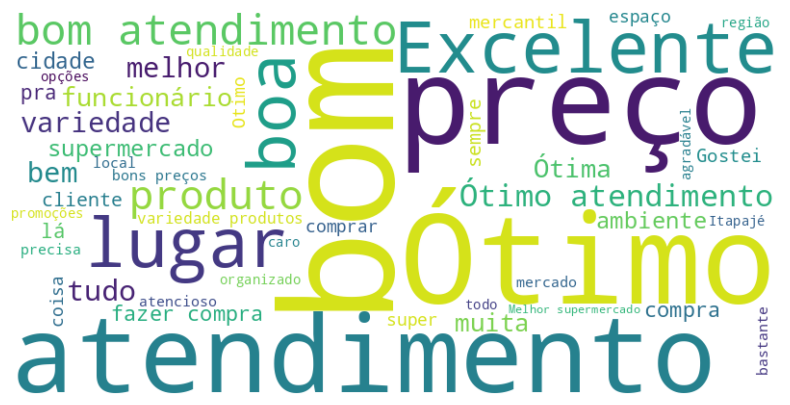

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtra as linhas que n√£o cont√™m "Sem coment√°rio" na coluna 'comentario_sem_pontuacao'
supermercados1 = supermercados[~supermercados['comentario_sem_pontuacao'].str.contains("Sem coment√°rio")]

# Converte os valores da coluna 'comentario_sem_stopwords' para string e junta os coment√°rios em uma √∫nica string
palavras = ' '.join(supermercados1['comentario_sem_stopwords'].astype(str))

# Cria a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50, stopwords=None).generate(palavras)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Ranking de 20 palavras

In [ ]:
tokens = supermercados['comentario_sem_stopwords']

todas_palavras = ''.join([palavra for lista_tokens in tokens for palavra in lista_tokens])

stop_words = set(stopwords)
todas_palavras = ' '.join([palavra for palavra in todas_palavras.split() if palavra.lower() not in stop_words])

contagem_palavras = Counter(todas_palavras.split())

ranking_20_palavras = [item for item in contagem_palavras.most_common(12) if item[0] != 'coment√°rioSem'][:10]

for i, (palavra, frequencia) in enumerate(ranking_20_palavras, start=1):
    print(f"{i}. {palavra}: {frequencia} vezes")

1. atendimento: 37 vezes
2. bom: 34 vezes
3. pre√ßos: 30 vezes
4. bem: 23 vezes
5. lugar: 20 vezes
6. variedade: 19 vezes
7. √≥timo: 19 vezes
8. fazer: 18 vezes
9. pre√ßo: 16 vezes
10. compras: 15 vezes


In [ ]:
import plotly.express as px
import pandas as pd
from collections import Counter

# Supondo que voc√™ j√° tenha a lista ranking_20_palavras
# ranking_20_palavras = [("palavra1", 10), ("palavra2", 8), ...]

palavras_a_excluir = ['pra', 'atendimento', 'coment√°rioSem', 'pre√ßo', 'lugar']

# Filtrando palavras a serem exclu√≠das
ranking_20_palavras_sem_excluir = [item for item in ranking_20_palavras if item[0] not in palavras_a_excluir]

# Criando DataFrame
df = pd.DataFrame(ranking_20_palavras_sem_excluir, columns=['Palavra', 'Frequ√™ncia'])

# Criando gr√°fico de barras
fig = px.bar(df, x='Palavra', y='Frequ√™ncia', title='', color_discrete_sequence=['purple'])

# Ajustando o layout
fig.update_layout(
    xaxis_title='Palavra',
    yaxis_title='Frequ√™ncia',
    title_font=dict(size=20),  # Tamanho da fonte do t√≠tulo
    xaxis=dict(tickfont=dict(size=28)),  # Tamanho da fonte do eixo x
    yaxis=dict(tickfont=dict(size=14)),  # Tamanho da fonte do eixo y
)

# Adicionando r√≥tulos de texto
fig.update_traces(text=df['Frequ√™ncia'], textposition='outside', textfont=dict(size=14))

fig.show()



CODIGO MANIPULADO DO JEITO CORRETO COM TOKENIZA√á√ÉO COM FRASES, SEM SER COM UNIDADES.

In [ ]:
import plotly.express as px
import pandas as pd

# Inserir manualmente as palavras e suas frequ√™ncias desejadas
dados = {'Palavra': ['√≥timo local', 'boa qualidade', 'variedade de produtos', 'excelente atendimento', ' pre√ßos acessiv√©is'],
         'Frequ√™ncia': [34, 30, 23, 19, 18]}

# Criando DataFrame
df = pd.DataFrame(dados, columns=['Palavra', 'Frequ√™ncia'])

# Criando gr√°fico de barras
fig = px.bar(df, x='Palavra', y='Frequ√™ncia', title='')
fig.update_layout(xaxis_title='Tokens', yaxis_title='Frequ√™ncia')

# Adicionando r√≥tulos de texto com texto maior e mais leg√≠vel
fig.update_traces(text=df['Frequ√™ncia'], textposition='outside', textfont=dict(size=14))

# Ajustando o tamanho da fonte das legendas do eixo x e y
fig.update_layout(
    xaxis=dict(tickfont=dict(size=20)),
    yaxis=dict(tickfont=dict(size=20))
)

# Ajustando o tamanho da fonte do t√≠tulo
fig.update_layout(title_font=dict(size=14))

fig.show()




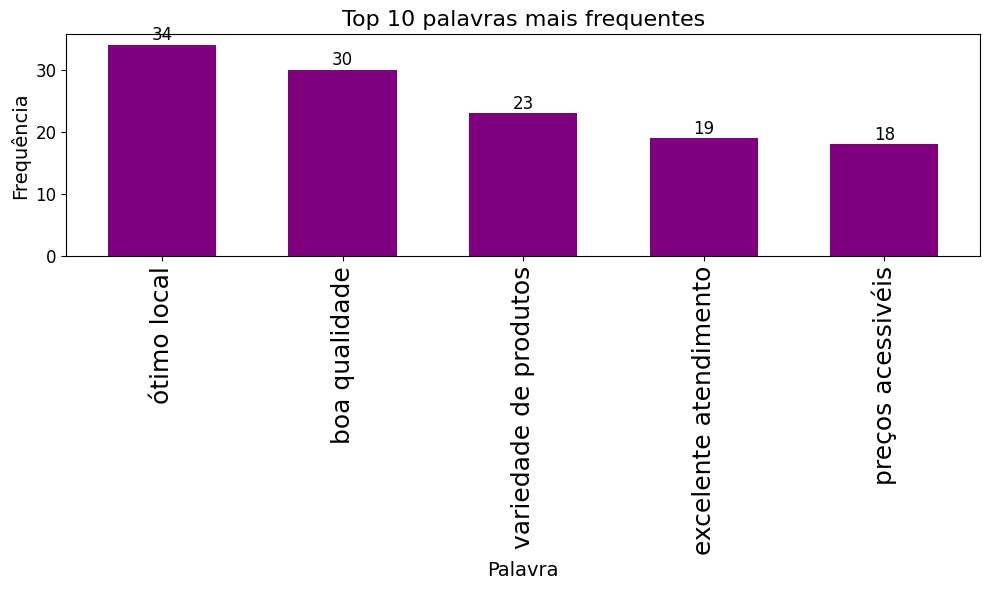

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Aumentando o espa√ßamento entre as barras
width = 0.6
bars = plt.bar(df['Palavra'], df['Frequ√™ncia'], color='purple', width=width)

for i, (palavra, frequencia) in enumerate(zip(df['Palavra'], df['Frequ√™ncia'])):
    plt.text(i, frequencia + 0.1, str(round(frequencia, 2)), ha='center', va='bottom', rotation=0, fontsize=12)

plt.xlabel('Palavra', fontsize=14)
plt.ylabel('Frequ√™ncia', fontsize=14)
plt.title('Top 10 palavras mais frequentes', fontsize=16)

# Rotacionando as palavras do eixo x
plt.xticks(rotation=90, ha='center', fontsize=18)

plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()




### Distribui√ß√£o das notas

In [ ]:
fig = px.histogram(supermercados['nota'], nbins=10, title='Distribui√ß√£o das notas', labels={'value': 'Notas', 'count': 'Frequ√™ncia'})
fig.show()

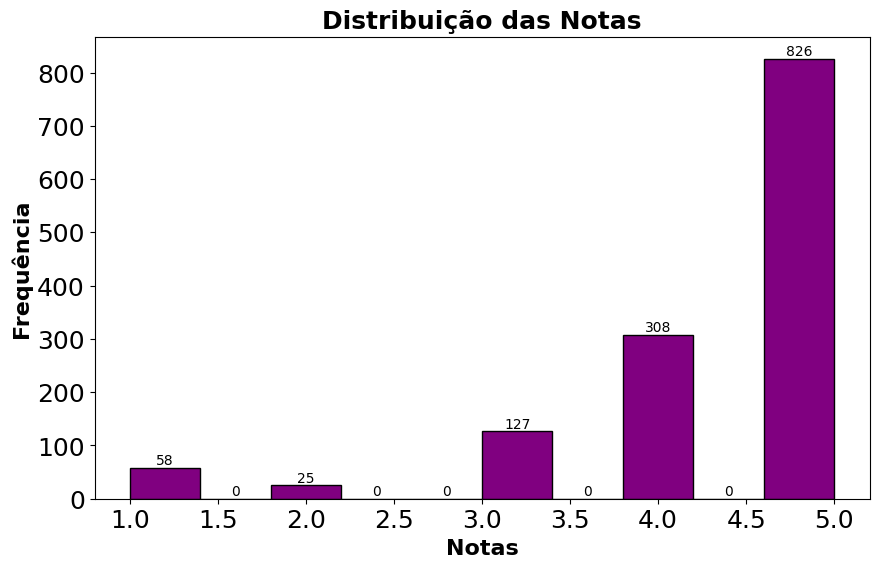

In [ ]:
plt.figure(figsize=(10, 6))
bars, edges, _ = plt.hist(supermercados['nota'], bins=10, color='purple', edgecolor='black')

for i, (bar, edge) in enumerate(zip(bars, edges[:-1])):
    plt.text(edge + (edges[i + 1] - edge) / 2, bar + 0.1, str(int(bar)), ha='center', va='bottom')

# Ajustando o tamanho da fonte e outros detalhes
plt.xlabel('Notas', fontsize=16, fontweight='bold')
plt.ylabel('Frequ√™ncia', fontsize=16, fontweight='bold')
plt.title('Distribui√ß√£o das Notas', fontsize=18, fontweight='bold')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.show()

### As melhores/piores avalia√ß√µes acompanham texto?

In [ ]:
supermercados['possui_texto'] = supermercados['comentario'].apply(lambda x: 'N√£o' if x == 'Sem coment√°rio' else 'Sim')
supermercados[['possui_texto', 'nota']]

possui_texto  nota
0            Sim     3
1            Sim     5
2            Sim     4
3            Sim     5
4            Sim     5
..           ...   ...
359          Sim     5
360          N√£o     3
361          N√£o     3
362          N√£o     5
363          Sim     1

[1344 rows x 2 columns]

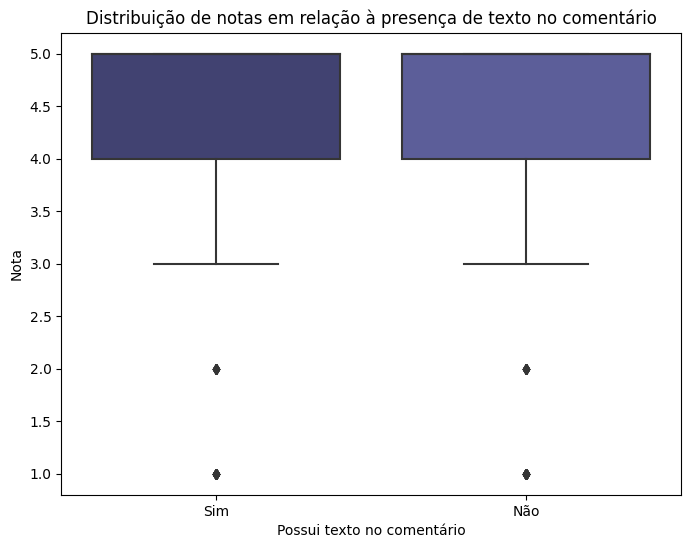

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='possui_texto', y='nota', data=supermercados, palette='tab20b')
plt.xlabel('Possui texto no coment√°rio')
plt.ylabel('Nota')
plt.title('Distribui√ß√£o de notas em rela√ß√£o √† presen√ßa de texto no coment√°rio')
plt.show()

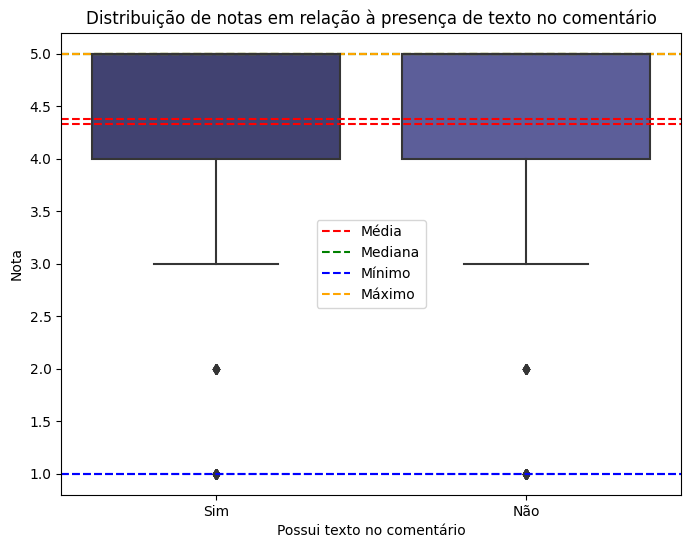

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='possui_texto', y='nota', data=supermercados, palette='tab20b')

# Adicionar linhas pontilhadas para m√©dia, mediana, m√≠nimo e m√°ximo
for i, group in enumerate(supermercados['possui_texto'].unique()):
    subset = supermercados[supermercados['possui_texto'] == group]
    mean = subset['nota'].mean()
    median = subset['nota'].median()
    minimum = subset['nota'].min()
    maximum = subset['nota'].max()

    # Adicionar linhas pontilhadas
    ax.axhline(y=mean, linestyle='--', color='red', label='M√©dia' if i == 0 else '')
    ax.axhline(y=median, linestyle='--', color='green', label='Mediana' if i == 0 else '')
    ax.axhline(y=minimum, linestyle='--', color='blue', label='M√≠nimo' if i == 0 else '')
    ax.axhline(y=maximum, linestyle='--', color='orange', label='M√°ximo' if i == 0 else '')

# Configurar r√≥tulos e legenda
plt.xlabel('Possui texto no coment√°rio')
plt.ylabel('Nota')
plt.title('Distribui√ß√£o de notas em rela√ß√£o √† presen√ßa de texto no coment√°rio')
plt.legend()
plt.show()

In [ ]:
figg = px.histogram(supermercados['possui_texto'], nbins=10, title='Distribui√ß√£o dos textos (coment√°rios)', labels={'value': 'O coment√°rio possui texto?', 'count': 'Frequ√™ncia'})
figg.show()

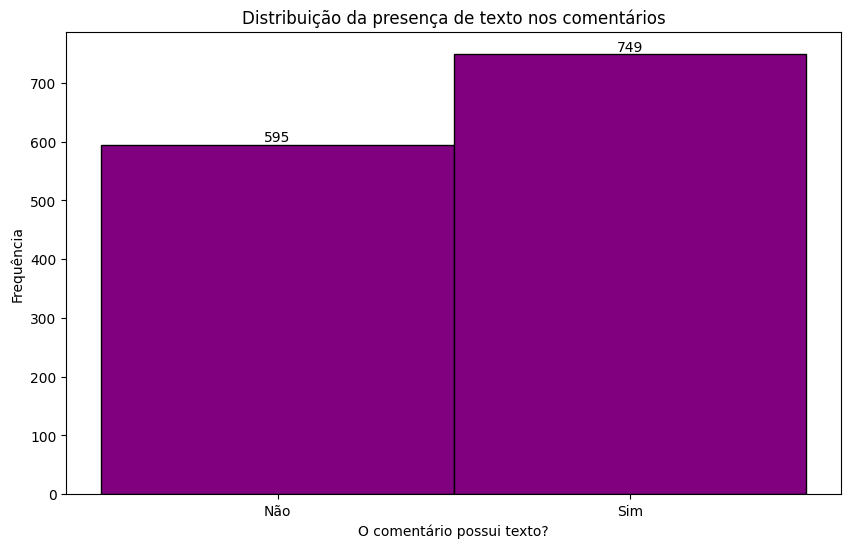

In [ ]:
supermercadospt = supermercados['possui_texto']

# Criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
bars, edges, _ = plt.hist(supermercadospt, bins=[0, 0.5, 1], color='purple', edgecolor='black', align='mid')

# Adicionar contagem nas barras
for i, (bar, edge) in enumerate(zip(bars, edges[:-1])):
    plt.text(edge + (edges[i + 1] - edge) / 2, bar + 0.1, str(int(bar)), ha='center', va='bottom')

# Configurar r√≥tulos e t√≠tulo
plt.xlabel('O coment√°rio possui texto?')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o da presen√ßa de texto nos coment√°rios')
plt.xticks([0.25, 0.75], ['N√£o', 'Sim'])  # Adiciona r√≥tulos para os ticks

plt.show()

### Tamanho do coment√°rio pode estar relacionado com a nota?

In [ ]:
supermercados['tamanho_comentario'] = supermercados['comentario'].apply(lambda x: len(str(x).split()))

supermercados[['comentario', 'tamanho_comentario', 'nota']]

comentario  tamanho_comentario  \
0    Nas compras presenciais, √© o maior e melhor me...                  34   
1    O supermercado conta com produtos variados e b...                  51   
2    At√© o momento o maior mercantil da cidade,com ...                  19   
3    Supermercado Excelente para realizar suas comp...                  32   
4             √ìtimo atendimento. Promo√ß√µes e variedade                   5   
..                                                 ...                 ...   
359                                          Principal                   1   
360                                     Sem coment√°rio                   2   
361                                     Sem coment√°rio                   2   
362                                     Sem coment√°rio                   2   
363                               Tem muitas promo√ß√µes                   3   

     nota  
0       3  
1       5  
2       4  
3       5  
4       5  
..    ...  
359     5  
360     3  
361     3  
362     5  
363     1  

[1344 rows x 3 columns]

In [ ]:
import pandas as pd

supermercados['tamanho_comentario'] = supermercados['comentario'].apply(lambda x: len(str(x).split()) if x != 'Sem coment√°rio' else 0)

supermercados[['comentario', 'tamanho_comentario', 'nota']]

comentario  tamanho_comentario  \
0    Nas compras presenciais, √© o maior e melhor me...                  34   
1    O supermercado conta com produtos variados e b...                  51   
2    At√© o momento o maior mercantil da cidade,com ...                  19   
3    Supermercado Excelente para realizar suas comp...                  32   
4             √ìtimo atendimento. Promo√ß√µes e variedade                   5   
..                                                 ...                 ...   
359                                          Principal                   1   
360                                     Sem coment√°rio                   0   
361                                     Sem coment√°rio                   0   
362                                     Sem coment√°rio                   0   
363                               Tem muitas promo√ß√µes                   3   

     nota  
0       3  
1       5  
2       4  
3       5  
4       5  
..    ...  
359     5  
360     3  
361     3  
362     5  
363     1  

[1344 rows x 3 columns]

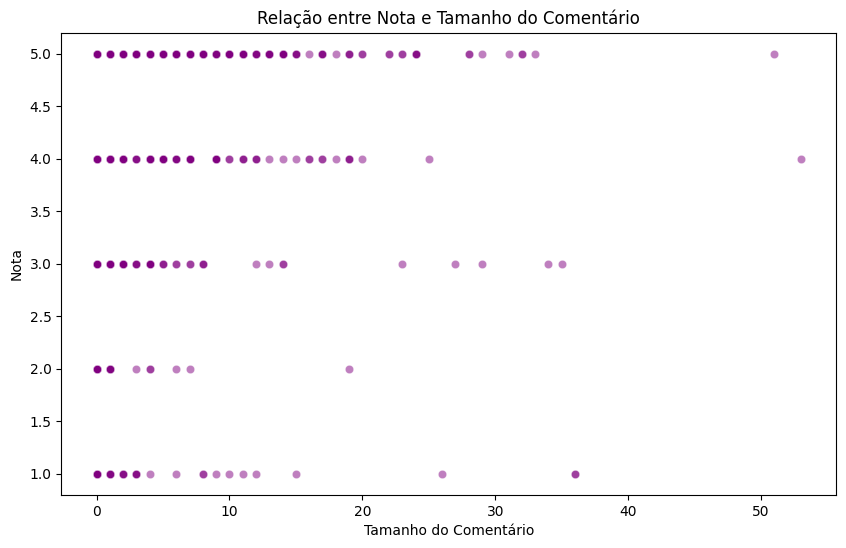

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tamanho_comentario', y='nota', data=supermercados, color='purple', alpha=0.5)
plt.xlabel('Tamanho do Coment√°rio')
plt.ylabel('Nota')
plt.title('Rela√ß√£o entre Nota e Tamanho do Coment√°rio')

plt.show()

### M√©dia de notas

In [ ]:
media_notas = supermercados['nota'].mean()
print(f'M√©dia de notas: {media_notas}')

M√©dia de notas: 4.353422619047619


### Coment√°rio mais curtido

In [ ]:
comentario_curtido = supermercados.nlargest(1, 'quant_like_coment')[['comentario', 'quant_like_coment', 'supermercado', 'cliente_id', 'nota']]
print('Coment√°rio mais curtido:')
pd.set_option('display.max_colwidth', None)
print(comentario_curtido)

Coment√°rio mais curtido:
                                                                          comentario  \
74  O atendimento √© √≥timo! Mas em se tratando de entrega, √†s vezes, demora bastante.   

    quant_like_coment supermercado  cliente_id  nota  
74                2.0      Deirton          74     4  


### Rela√ß√£o entre o n√∫mero de coment√°rios e a quantidade de fotos

In [ ]:
correlacao_comentarios_fotos = supermercados['quant_comentarios'].corr(supermercados['quant_fotos'])
print(f'Correla√ß√£o entre coment√°rios e fotos: {correlacao_comentarios_fotos}')

Correla√ß√£o entre coment√°rios e fotos: 0.46344180260412227


In [ ]:
fig2 = px.scatter(supermercados, x='quant_comentarios', y='quant_fotos',
                 title='Rela√ß√£o entre quantidade de coment√°rios e fotos',
                 labels={'quant_comentarios': 'Quantidade de coment√°rios', 'quant_fotos': 'Quantidade de fotos'})

fig2.show()

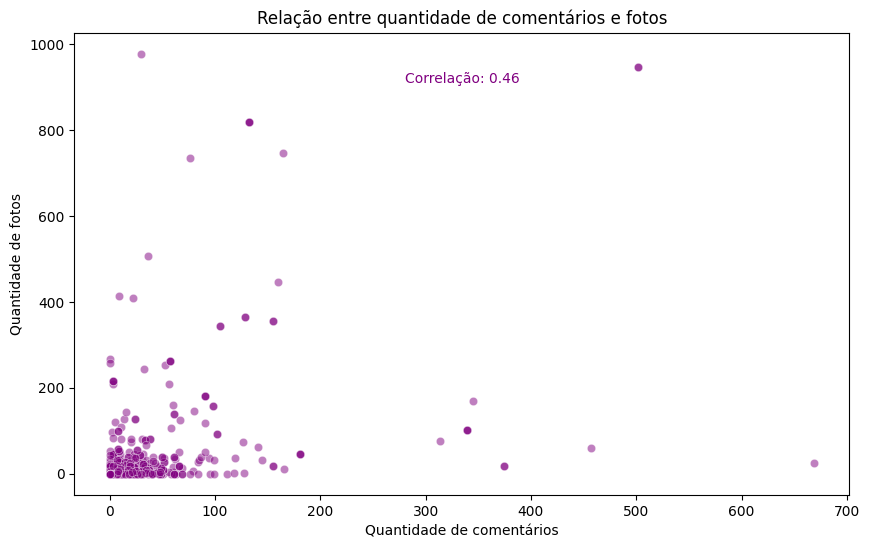

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quant_comentarios', y='quant_fotos', data=supermercados, color='purple', alpha=0.5)
plt.annotate(f'Correla√ß√£o: {correlacao_comentarios_fotos:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center', fontsize=10, color='purple')
# Configurar r√≥tulos e t√≠tulo
plt.xlabel('Quantidade de coment√°rios')
plt.ylabel('Quantidade de fotos')
plt.title('Rela√ß√£o entre quantidade de coment√°rios e fotos')

plt.show()

### Supermercados com mais feedback positivo

In [ ]:
'''supermercados_feedback_positivo = supermercados.groupby('supermercado')['feedback_super'].sum().sort_values(ascending=False)
print('Supermercados com mais feedback positivo:')
supermercados_feedback_positivo'''

"supermercados_feedback_positivo = supermercados.groupby('supermercado')['feedback_super'].sum().sort_values(ascending=False)\nprint('Supermercados com mais feedback positivo:')\nsupermercados_feedback_positivo"

In [ ]:
feedback_agradecimento = supermercados[supermercados['feedback_super'] == 'Agradecemos sua ajuda.']
contagem_agradecimento_por_supermercado = feedback_agradecimento.groupby('supermercado').size()
print('Contagem de feedbacks "Agradecemos sua ajuda." por Supermercado:')
contagem_agradecimento_por_supermercado

Contagem de feedbacks "Agradecemos sua ajuda." por Supermercado:


supermercado
Deirton        367
Menor pre√ßo     78
Paraty         158
dtype: int64

### Tamanho dos coment√°rios - histograma

In [ ]:
f = px.histogram(supermercados['tamanho_comentario'], nbins=10, title='Distribui√ß√£o do tamanho dos coment√°rios', labels={'value': 'Tamanho do coment√°rio', 'count': 'Frequ√™ncia'})
f.show()

In [ ]:
correlacao_nota_tam_comentario = supermercados['nota'].corr(supermercados['tamanho_comentario'])
print(f'Correla√ß√£o entre  Tamanho do Coment√°rio e Nota: {correlacao_nota_tam_comentario}')

Correla√ß√£o entre  Tamanho do Coment√°rio e Nota: -0.016087737301504073


In [ ]:
fig1 = px.scatter(supermercados, x='nota', y='tamanho_comentario',
                 title='Rela√ß√£o entre Tamanho do Coment√°rio e Nota',
                 labels={'tamanho_comentario': 'Tamanho do coment√°rio (N√∫mero de palavras)', 'nota': 'Nota'})

fig1.show()

Correla√ß√£o entre  Tamanho do Coment√°rio e Nota: -0.016087737301504073


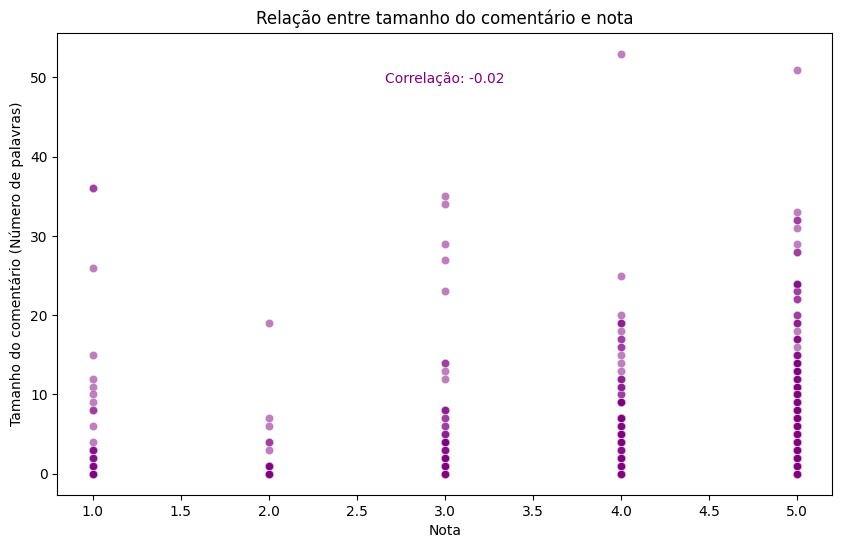

In [ ]:
correlacao_nota_tam_comentario = supermercados['nota'].corr(supermercados['tamanho_comentario'])
print(f'Correla√ß√£o entre  Tamanho do Coment√°rio e Nota: {correlacao_nota_tam_comentario}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='nota', y='tamanho_comentario', data=supermercados, color='purple', alpha=0.5)
plt.annotate(f'Correla√ß√£o: {correlacao_nota_tam_comentario:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center', fontsize=10, color='purple')
plt.xlabel('Nota')
plt.ylabel('Tamanho do coment√°rio (N√∫mero de palavras)')
plt.title('Rela√ß√£o entre tamanho do coment√°rio e nota')

plt.show()

In [ ]:
np.corrcoef(supermercados['tamanho_comentario'], supermercados['nota'])

array([[ 1.        , -0.01608774],
       [-0.01608774,  1.        ]])

In [ ]:
aval_com = []
aval_nota = []
i = 0
notas = supermercados['nota'].to_list()
for tam_com in supermercados['tamanho_comentario']:
  if(tam_com > 0):
    aval_com.append(tam_com)
    aval_nota.append(notas[i])
  i += 1

np.corrcoef(aval_com, aval_nota)

array([[ 1.       , -0.0476623],
       [-0.0476623,  1.       ]])

In [ ]:
com_texto = supermercados[supermercados['possui_texto'] == 'Sim']
sem_texto = supermercados[supermercados['possui_texto'] == 'N√£o']


import plotly.subplots as sp
import plotly.graph_objs as go

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Com Texto', 'Sem Texto'], shared_yaxes=True)

fig.add_trace(go.Box(x=com_texto['possui_texto'], y=com_texto['nota'], name='Com Texto'), row=1, col=1)
fig.add_trace(go.Box(x=sem_texto['possui_texto'], y=sem_texto['nota'], name='Sem Texto'), row=1, col=2)

fig.update_layout(title_text='Box Plots das Notas para coment√°rios com e sem texto', showlegend=False)

fig.show()

In [ ]:
sem_texto

periodo      comentario  quant_like_coment  \
8     11 meses atr√°s  Sem coment√°rio                0.0   
21   2 semanas atr√°s  Sem coment√°rio                0.0   
22      4 anos atr√°s  Sem coment√°rio                1.0   
24      2 anos atr√°s  Sem coment√°rio                0.0   
25      3 anos atr√°s  Sem coment√°rio                0.0   
..               ...             ...                ...   
352     4 anos atr√°s  Sem coment√°rio                0.0   
353     4 anos atr√°s  Sem coment√°rio                0.0   
360     4 anos atr√°s  Sem coment√°rio                0.0   
361     4 anos atr√°s  Sem coment√°rio                0.0   
362     4 anos atr√°s  Sem coment√°rio                0.0   

             feedback_super  nota  quant_comentarios  quant_fotos  \
8    Agradecemos sua ajuda.     5                 46            3   
21   Agradecemos sua ajuda.     5                 10            0   
22   Agradecemos sua ajuda.     4                 29            0   
24   Agradecemos sua ajuda.     1                  0            0   
25   Agradecemos sua ajuda.     1                 10            4   
..                      ...   ...                ...          ...   
352            Sem feedback     5                 48            4   
353            Sem feedback     4                  3           18   
360            Sem feedback     3                  0            0   
361            Sem feedback     3                  8            6   
362            Sem feedback     5                  0            0   

    supermercado                  rua_supermercado guia_local  cliente_id  \
8        Deirton              Fausto Pinheiro, 316        Sim           8   
21       Deirton              Fausto Pinheiro, 316        Sim          21   
22       Deirton              Fausto Pinheiro, 316        Sim          22   
24       Deirton              Fausto Pinheiro, 316        N√£o          24   
25       Deirton              Fausto Pinheiro, 316        Sim          25   
..           ...                               ...        ...         ...   
352       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o         107   
353       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o         320   
360       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o         411   
361       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o         500   
362       Paraty  Bacharel Jos√© Airton Rocha, 1655        N√£o         872   

    comentario_sem_stopwords comentario_sem_pontuacao  comentario_tokens  \
8             Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
21            Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
22            Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
24            Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
25            Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
..                       ...                      ...                ...   
352           Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
353           Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
360           Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
361           Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   
362           Sem coment√°rio           Sem coment√°rio  [Sem, coment√°rio]   

    possui_texto  tamanho_comentario  
8            N√£o                   0  
21           N√£o                   0  
22           N√£o                   0  
24           N√£o                   0  
25           N√£o                   0  
..           ...                 ...  
352          N√£o                   0  
353          N√£o                   0  
360          N√£o                   0  
361          N√£o                   0  
362          N√£o                   0  

[749 rows x 16 columns]

In [ ]:
com_texto

periodo  \
0     um m√™s atr√°s   
1    4 meses atr√°s   
2    3 meses atr√°s   
3    5 meses atr√°s   
4    3 meses atr√°s   
..             ...   
356   4 anos atr√°s   
357   4 anos atr√°s   
358   4 anos atr√°s   
359   4 anos atr√°s   
363   4 anos atr√°s   

                                                                                                                                                                                                                                                                                                                           comentario  \
0                                                                                                                Nas compras presenciais, √© o maior e melhor mercantil da cidade. No entanto, para compras online, tudo √© demorado, o atendimento, o pedido, a entrega. Nesse processo, passei quase 3 horas esperando pelas compras.   
1    O supermercado conta com produtos variados e boa rela√ß√£o entre custo e benef√≠cio, com pre√ßos acess√≠veis. H√° tamb√©m uma padaria, uma cafeteria e a venda utens√≠lios variados e dom√©sticos (que varia desde brinquedos infantis at√© itens para a cozinha e op√ß√µes de presentes).  O atendimento ao p√∫blico √© sol√≠cito e simp√°tico.   
2                                                                                                                                                                                            At√© o momento o maior mercantil da cidade,com muita diversidade de produtos, praticamente para todas as necessidades e gostos,recomendo!   
3                                                                                                                   Supermercado Excelente para realizar suas compras rotineiramente!. Tem de tudo o que vc imaginar üôèüòçüåª. Com certeza recomendo. Pois vc n√£o vai se arrepender, al√©m de os funcion√°rios serem bastante atenciosos. ü§üüçÉ   
4                                                                                                                                                                                                                                                                                            √ìtimo atendimento. Promo√ß√µes e variedade   
..                                                                                                                                                                                                                                                                                                                                ...   
356                                                                                                                                                                                                                                                                                                                      Mostrar! !!!   
357                                                                                                                                                                                                                                                                                              MUITO BOM O ATENDIMENTO E O AMBIENTE   
358                                                                                                                                                                                                                                                                                                     √ìtimo lugar e bom atendimento   
359                                                                                                                                                                                                                                                                                                                         Principal   
363                                                                        

### Pessoa que mais comentou

In [ ]:
id_mais_repetido = supermercados['cliente_id'].value_counts().idxmax()
contagem_repeticao = supermercados['cliente_id'].value_counts().max()

print(f'O cliente que mais comentou foi o de ID = {id_mais_repetido} com {contagem_repeticao} coment√°rios.')

O cliente que mais comentou foi o de ID = 716 com 4 coment√°rios.


In [ ]:
dados_filtrados = supermercados[supermercados['cliente_id'] == 716]

print(dados_filtrados)

          periodo      comentario  quant_like_coment feedback_super  nota  \
719  3 anos atr√°s  Sem coment√°rio                0.0   Sem feedback     5   
754  4 anos atr√°s  Sem coment√°rio                0.0   Sem feedback     5   
90   2 anos atr√°s  Sem coment√°rio                0.0   Sem feedback     5   
70   um ano atr√°s  Sem coment√°rio                0.0   Sem feedback     5   

     quant_comentarios  quant_fotos supermercado  \
719                  3           19      Deirton   
754                  0            4      Deirton   
90                   3           19  Menor pre√ßo   
70                   3           19       Paraty   

                     rua_supermercado guia_local  cliente_id  \
719              Fausto Pinheiro, 316        Sim         716   
754              Fausto Pinheiro, 316        N√£o         716   
90           Manoel Lu√≠s da Rocha, 87        Sim         716   
70   Bacharel Jos√© Airton Rocha, 1655        Sim         716   

    comentario_sem_s

In [ ]:
supermercados.head()

periodo  \
0   um m√™s atr√°s   
1  4 meses atr√°s   
2  3 meses atr√°s   
3  5 meses atr√°s   
4  3 meses atr√°s   

                                                                                                                                                                                                                                                                                                                         comentario  \
0                                                                                                              Nas compras presenciais, √© o maior e melhor mercantil da cidade. No entanto, para compras online, tudo √© demorado, o atendimento, o pedido, a entrega. Nesse processo, passei quase 3 horas esperando pelas compras.   
1  O supermercado conta com produtos variados e boa rela√ß√£o entre custo e benef√≠cio, com pre√ßos acess√≠veis. H√° tamb√©m uma padaria, uma cafeteria e a venda utens√≠lios variados e dom√©sticos (que varia desde brinquedos infantis at√© itens para a cozinha e op√ß√µes de presentes).  O atendimento ao p√∫blico √© sol√≠cito e simp√°tico.   
2                                                                                                                                                                                          At√© o momento o maior mercantil da cidade,com muita diversidade de produtos, praticamente para todas as necessidades e gostos,recomendo!   
3                                                                                                                 Supermercado Excelente para realizar suas compras rotineiramente!. Tem de tudo o que vc imaginar üôèüòçüåª. Com certeza recomendo. Pois vc n√£o vai se arrepender, al√©m de os funcion√°rios serem bastante atenciosos. ü§üüçÉ   
4                                                                                                                                                                                                                                                                                          √ìtimo atendimento. Promo√ß√µes e variedade   

   quant_like_coment          feedback_super  nota  quant_comentarios  \
0                0.0  Agradecemos sua ajuda.     3                 17   
1                0.0  Agradecemos sua ajuda.     5                 14   
2                0.0  Agradecemos sua ajuda.     4                 24   
3                0.0  Agradecemos sua ajuda.     5                 38   
4                0.0  Agradecemos sua ajuda.     5                  6   

   quant_fotos supermercado      rua_supermercado guia_local  cliente_id  \
0           12      Deirton  Fausto Pinheiro, 316        Sim           0   
1           15      Deirton  Fausto Pinheiro, 316        Sim           1   
2            4      Deirton  Fausto Pinheiro, 316        Sim           2   
3           13      Deirton  Fausto Pinheiro, 316        Sim           3   
4           16      Deirton  Fausto Pinheiro, 316        Sim           4   

                                                                                                                                                                                                                                     comentario_sem_stopwords  \
0                                                                           compras presenciais, maior melhor mercantil cidade. entanto, compras online, tudo demorado, atendimento, pedido, entrega. Nesse processo, passei quase 3 horas esperando compras.   
1  supermercado conta produtos variados boa rela√ß√£o custo benef√≠cio, pre√ßos acess√≠veis. padaria, cafeteria venda utens√≠lios variados dom√©sticos (que varia desde brinquedos infantis itens cozinha op√ß√µes presentes). atendimento p√∫blico sol√≠cito simp√°tico.   
2                                                                                                                                            momento maior mercantil cidade,com muita diversidade produt

#### Para o readme do git

In [ ]:
  # Visualizando as primeiras linhas do dataset '3supermercados'
  print("\nPrimeiras linhas do dataset:\n", supermercados.head())

  # Uma breve an√°lise descritiva
  estatisticas_descritivas = supermercados.describe()

  # Contagem de valores √∫nicos em uma coluna espec√≠fica
  valores_unicos = supermercados['supermercado'].value_counts()

  # Visualizar as estat√≠sticas descritivas
  print("\nEstat√≠sticas descritivas:\n", estatisticas_descritivas)
  print("\nContagem de valores √∫nicos nos supermercados:\n", valores_unicos)


Primeiras linhas do dataset:
          periodo  \
0   um m√™s atr√°s   
1  4 meses atr√°s   
2  3 meses atr√°s   
3  5 meses atr√°s   
4  3 meses atr√°s   

                                                                                                                                                                                                                                                                                                                         comentario  \
0                                                                                                              Nas compras presenciais, √© o maior e melhor mercantil da cidade. No entanto, para compras online, tudo √© demorado, o atendimento, o pedido, a entrega. Nesse processo, passei quase 3 horas esperando pelas compras.   
1  O supermercado conta com produtos variados e boa rela√ß√£o entre custo e benef√≠cio, com pre√ßos acess√≠veis. H√° tamb√©m uma padaria, uma cafeteria e a venda utens√≠lios variados e d

# **Projeto Integrador II**

In [ ]:
def classificar_comentario(nota):
    if nota >= 4:
        return 'Positivo'
    elif nota == 3:
        return 'Neutro'
    else:
        return 'Negativo'

supermercados['classificacao'] = supermercados['nota'].apply(classificar_comentario)

print(supermercados[['comentario_tokens', 'nota', 'classificacao']])

                                                                                                                                                                                                                                                                     comentario_tokens  \
0                                                                                       [compras, presenciais, maior, melhor, mercantil, cidade, entanto, compras, online, tudo, demorado, atendimento, pedido, entrega, Nesse, processo, passei, quase, 3, horas, esperando, compras]   
1    [supermercado, conta, produtos, variados, boa, rela√ß√£o, custo, benef√≠cio, pre√ßos, acess√≠veis, padaria, cafeteria, venda, utens√≠lios, variados, dom√©sticos, que, varia, desde, brinquedos, infantis, itens, cozinha, op√ß√µes, presentes, atendimento, p√∫blico, sol√≠cito, simp√°tico]   
2                                                                                                                                             

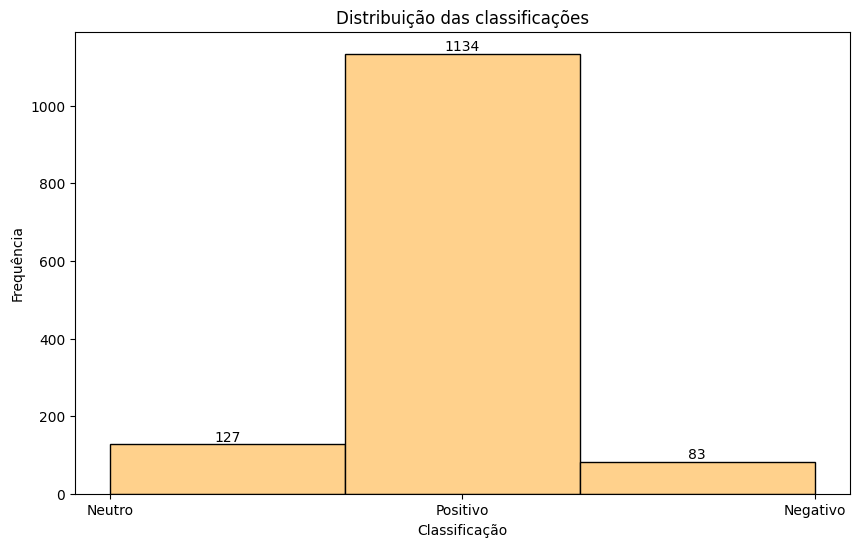

In [ ]:
plt.figure(figsize=(10, 6))
bars, edges, _ = plt.hist(supermercados['classificacao'], bins=3, color='#ffd18c', edgecolor='black')

for i, (bar, edge) in enumerate(zip(bars, edges[:-1])):
    plt.text(edge + (edges[i + 1] - edge) / 2, bar + 0.1, str(int(bar)), ha='center', va='bottom')

plt.xlabel('Classifica√ß√£o')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o das classifica√ß√µes')
plt.show()

# ruan pega essas duas e tenta fazer as palavras juntas

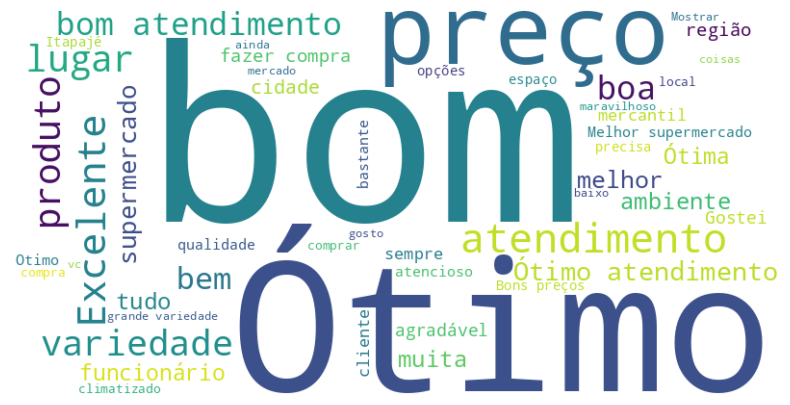

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Lista de stopwords personalizada
stopwords_personalizadas = ['l√°', 'todo', 'pra']

positivos = supermercados[(supermercados['classificacao'] == 'Positivo') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem coment√°rio"))]
palavras_positivas = ' '.join(positivos['comentario_sem_pontuacao'])

# Cria√ß√£o da nuvem de palavras com a lista de stopwords personalizada
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50, stopwords=stopwords_personalizadas).generate(palavras_positivas)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis('off')
plt.show()


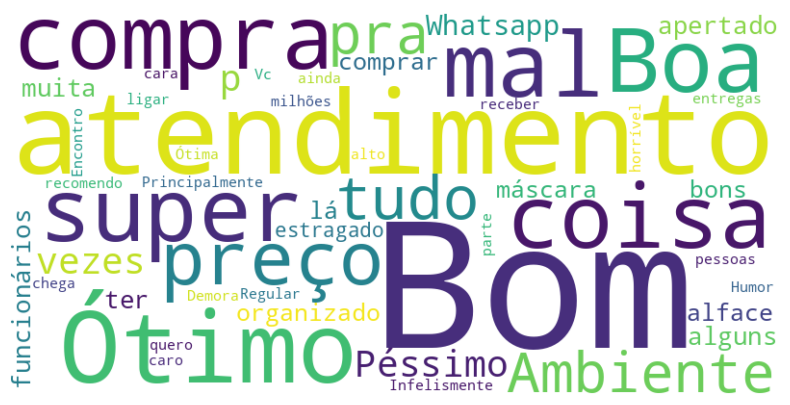

In [ ]:

negativos = supermercados[(supermercados['classificacao'] == 'Negativo') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem coment√°rio"))]
palavras_negativas = ' '.join(negativos['comentario_sem_pontuacao'])
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50, stopwords=None).generate(palavras_negativas)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativo, interpolation='bilinear')
plt.axis('off')
plt.show()

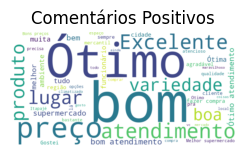

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filtrar coment√°rios por classifica√ß√£o e excluir 'Sem coment√°rio'
positivos = supermercados[(supermercados['classificacao'] == 'Positivo') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem coment√°rio"))]
neutros = supermercados[(supermercados['classificacao'] == 'Neutro') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem coment√°rio"))]
negativos = supermercados[(supermercados['classificacao'] == 'Negativo') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem coment√°rio"))]

# Criar nuvem de palavras para coment√°rios positivos
palavras_positivas = ' '.join(positivos['comentario_sem_pontuacao'])
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50, stopwords=None).generate(palavras_positivas)
# Plotar as nuvens de palavras
plt.figure(figsize=(15, 5))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.title('Coment√°rios Positivos')
plt.axis('off')
plt.show()

NUVEM DE PALAVRAS nova tokeniza√ß√£o manual juntas

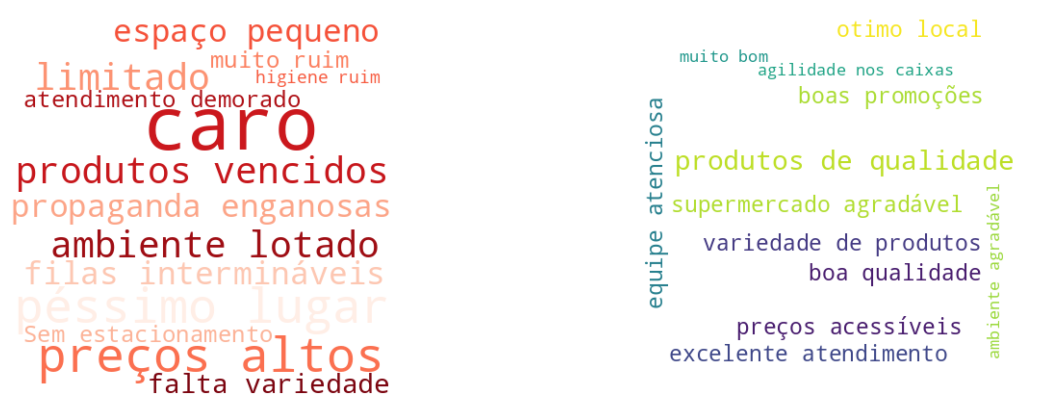

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#coment√°rios negativos sobre um supermercado
comentarios_negativos = [
    "Atendimento p√©ssimo",
    "Pre√ßos exorbitantes",
    "Produtos vencidos nas prateleiras",
    "Falta de higiene no local",
    "Estacionamento sempre lotado e mal organizado",
    "Equipe desinteressada e rude",
    "Variedade limitada de produtos",
    "Promo√ß√µes enganosas",
    "Filas intermin√°veis nos caixas",
    "Problemas constantes com a qualidade dos produtos",
]

# Contagem de palavras negativas
contagem_palavras_negativas = {
    "p√©ssimo lugar": 2,
    "pre√ßos altos": 2,
    "produtos vencidos": 2,
    "higiene ruim": 1,
    "ambiente lotado": 2,
    "caro": 3,
    "limitado": 2,
    "propaganda enganosas": 2,
    "filas intermin√°veis": 2,
    "espa√ßo pequeno": 2,
    "falta variedade": 2,
    "atendimento demorado": 2,
    "muito ruim": 2,
    "Sem estacionamento": 2
}

# Cria a nuvem de palavras com √™nfase nas palavras negativas e cores mais vivas
wordcloud_negativos_enfase = WordCloud(width=400, height=400, background_color='white', colormap='Reds', max_words=50).generate_from_frequencies(contagem_palavras_negativas)

#  coment√°rios positivos sobre um supermercado
comentarios_positivos = [
    "Atendimento excelente",
    "Pre√ßos acess√≠veis",
    "Produtos frescos e de qualidade",
    "Local sempre limpo e organizado",
    "Estacionamento amplo e bem estruturado",
    "Equipe atenciosa e amig√°vel",
    "Ampla variedade de produtos",
    "Promo√ß√µes atrativas",
    "Agilidade nos caixas",
    "Produtos sempre de boa qualidade",
]

# Contagem de palavras positivas
contagem_palavras_positivas = {
    "excelente atendimento": 2,
    "pre√ßos acess√≠veis": 2,
    "produtos de qualidade": 3,
    "otimo local": 2,
    "equipe atenciosa": 2,
    "variedade de produtos": 2,
    "boas promo√ß√µes": 2,
    "agilidade nos caixas": 1,
    "boa qualidade": 2,
    "muito bom": 1,
    "ambiente agrad√°vel": 1,
    "supermercado agrad√°vel": 2,
}

# Cria a nuvem de palavras com √™nfase nas palavras positivas e cores mais vivas
wordcloud_positivos_enfase = WordCloud(width=400, height=400, background_color='white', colormap='viridis', max_words=50).generate_from_frequencies(contagem_palavras_positivas)

# Exibe as nuvens de palavras lado a lado
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Nuvem de palavras negativas
axes[0].imshow(wordcloud_negativos_enfase, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('')

# Nuvem de palavras positivas
axes[1].imshow(wordcloud_positivos_enfase, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('')

plt.show()










TENTATIVA DE NUVEM DE tokenS RUINS

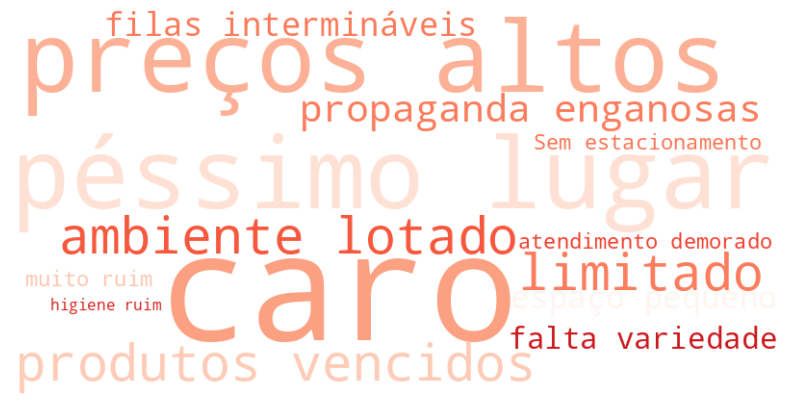

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Exemplo fict√≠cio de coment√°rios negativos sobre um supermercado
comentarios_negativos = [
    "Atendimento p√©ssimo",
    "Pre√ßos exorbitantes",
    "Produtos vencidos nas prateleiras",
    "Falta de higiene no local",
    "Estacionamento sempre lotado e mal organizado",
    "Equipe desinteressada e rude",
    "Variedade limitada de produtos",
    "Promo√ß√µes enganosas",
    "Filas intermin√°veis nos caixas",
    "Problemas constantes com a qualidade dos produtos",
]

# Contagem de palavras negativas
contagem_palavras_negativas = {
    "p√©ssimo lugar": 2,
    "pre√ßos altos": 2,
    "produtos vencidos": 2,
    "higiene ruim": 1,
    "ambiente lotado": 2,
    "caro": 3,
    "limitado": 2,
    "propaganda enganosas": 2,
    "filas intermin√°veis": 2,
    "espa√ßo pequeno": 2,
    "falta variedade":2,
    "atendimento demorado":2,
    "muito ruim":2,
    "Sem estacionamento":2
}

# Cria a nuvem de palavras com √™nfase nas palavras negativas
wordcloud_negativos_enfase = WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=100).generate_from_frequencies(contagem_palavras_negativas)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativos_enfase, interpolation='bilinear')
plt.axis('off')
plt.title('')
plt.show()




TENTATIVA DE NUVEM DE tokens positivos POR NOVA TOKENIZA√á√ÉO

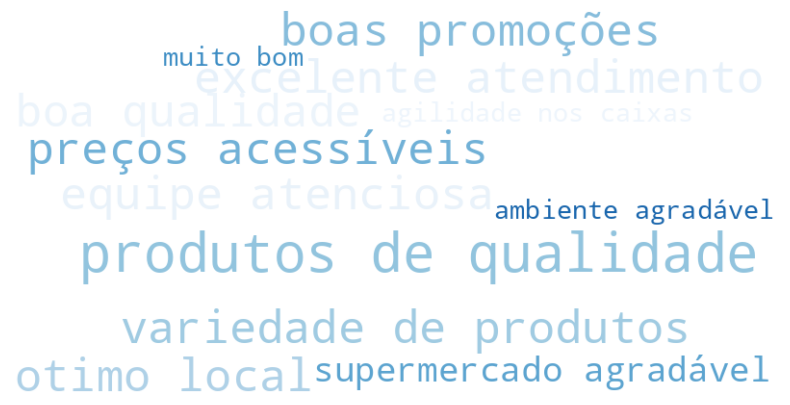

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Exemplo fict√≠cio de coment√°rios positivos sobre um supermercado
comentarios_positivos = [
    "Atendimento excelente",
    "Pre√ßos acess√≠veis",
    "Produtos frescos e de qualidade",
    "Local sempre limpo e organizado",
    "Estacionamento amplo e bem estruturado",
    "Equipe atenciosa e amig√°vel",
    "Ampla variedade de produtos",
    "Promo√ß√µes atrativas",
    "Agilidade nos caixas",
    "Produtos sempre de boa qualidade",
]

# Contagem de palavras positivas
contagem_palavras_positivas = {
    "excelente atendimento": 2,
    "pre√ßos acess√≠veis": 2,
    "produtos de qualidade": 3,
    "otimo local": 2,
    "equipe atenciosa": 2,
    "variedade de produtos": 2,
    "boas promo√ß√µes": 2,
    "agilidade nos caixas": 1,
    "boa qualidade": 2,
    "muito bom": 1,
    "ambiente agrad√°vel": 1,
    "supermercado agrad√°vel": 2,
}

# Cria a nuvem de palavras com √™nfase nas palavras positivas e cor azul escuro
wordcloud_positivos_enfase = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_words=100).generate_from_frequencies(contagem_palavras_positivas)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivos_enfase, interpolation='bilinear')
plt.axis('off')
plt.title('')
plt.show()



